In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np      
import statistics as st
# for numerical computation

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_palette("husl")

In [3]:
df = pd.read_excel("DS1_C5_S4_Credit_Data_Hackathon.xlsx") 
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


# Levels for Data Exploration

* Level 0 : Understanding Data
* Level 1 : Univariate Analysis 

## Level 0 Tasks: Understanding Data

* Visually inspect the first few and last few rows of the data.
* Check the shape of the data frame.
* Check the count of null values in each column.
* Inspect all the column names and cross check with the data dictionary.
* Check the information of the data frame using the info() function.


In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [5]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [6]:
df.shape

(100000, 24)

In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [8]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [9]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [10]:
df["NAME_TYPE_SUITE"].fillna(value=df["NAME_TYPE_SUITE"].mode, inplace=True)

In [11]:
df["AMT_GOODS_PRICE"].fillna(value=df["AMT_GOODS_PRICE"].mode, inplace=True)

In [12]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE            0
NAME_TYPE_SUITE            0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

LEVEL 1 Analysis 
-------------------------
Identify if the data type in each column is categorical or numerical?

1. Check if it is Nominal or Ordinal 
2. Check how many categories are present
3. Check the Mode 
4. Check for Missing values 
5. Think about how the missing values could be treated
6. Think about the kind of graph/chart that can be plotted using this data

Note: We are analyzing only one column at a time (Univariate Analysis).

In [13]:
# Seprating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique()<50:     
                                                   
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function


table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


In [14]:
def bar_percentage(ax, count: "number of rows in data "):
    for bar in ax.patches:                                            # ax.patches returns the rectange object from matplotlib
        percentage = f"{round((bar.get_height() / count) *100, 2)}%"  # first it calculate the bar height and then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.
        x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = bar.get_height()                                          # get_height: returns height of rectangle bar.
        ax.annotate(percentage, (x, y), va = "bottom", ha = "center") # va: Vertical axis: -> top means percentage would bneath the bar head. top, bottom or center 
                                                                      # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right.
                                                                      # annotate: used to annotate over objects. here objects are the bars 
    plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_count(ax, data):
    """
    Given a matplotlib axis object and a dataset, add count values as text labels to each bar in a bar chart.
    """
    # Get the total count of values in the dataset
    count = len(data)
    
    # Add the count values as text labels
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f"{height}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center',
                    va='bottom')

    # Show the plot
    plt.show()



# $$\;\;\;\; Univariate \ Analysis \ of \ Categorical \ Variables$$

## Level 1 Analysis (Univariate Analysis)

### User-defined function for level 1 analysis of categorical columns
This function will check for the following \
Unique values \
Mode \
Total count of missing values 

In [16]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
      

## 1. Analysis of NAME_CONTRACT_TYPE: Identification if loan is cash or revolving 

In [17]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


In [18]:
info_of_cat("GENDER")

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


In [19]:
df["GENDER"].replace({"XNA":"F"}, inplace=True)

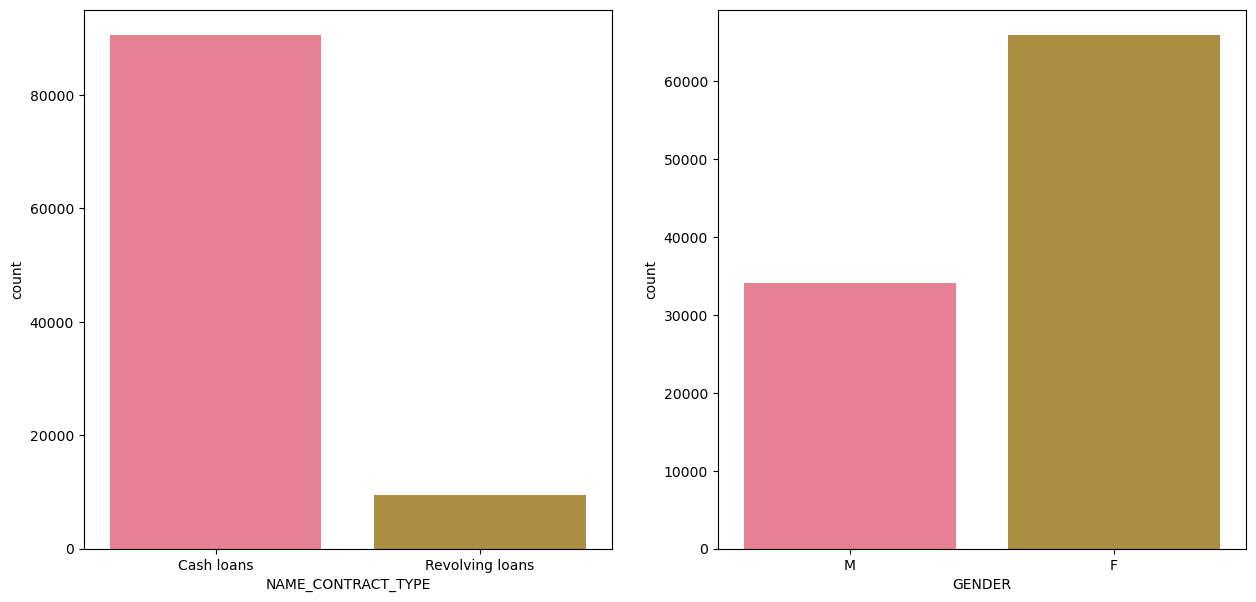

In [20]:
fig, ax = plt.subplots(1,2,figsize = (15, 7))
sns.countplot(x=df["NAME_CONTRACT_TYPE"], ax=ax[0])
sns.countplot(x=df["GENDER"], ax=ax[1])

plt.show()

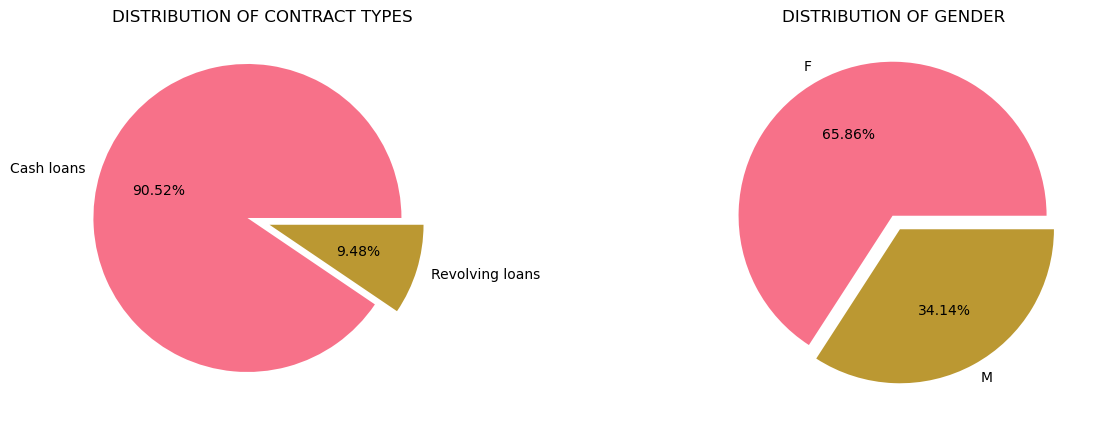

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].set_title("DISTRIBUTION OF CONTRACT TYPES")
ax[1].set_title("DISTRIBUTION OF GENDER ")
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index) # Converting the index of value counts into list
ax[0].pie(percentage,labels = labels, autopct= "%0.2f%%", explode=[0.1,0.05])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

percentage1 = df["GENDER"].value_counts()        
labels1 = list(df["GENDER"].value_counts().index) 
ax[1].pie(percentage1,labels = labels1, autopct= "%0.2f%%",explode=[0.05,0.05]) 
plt.show()

In [22]:
info_of_cat("NAME_INCOME_TYPE")

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


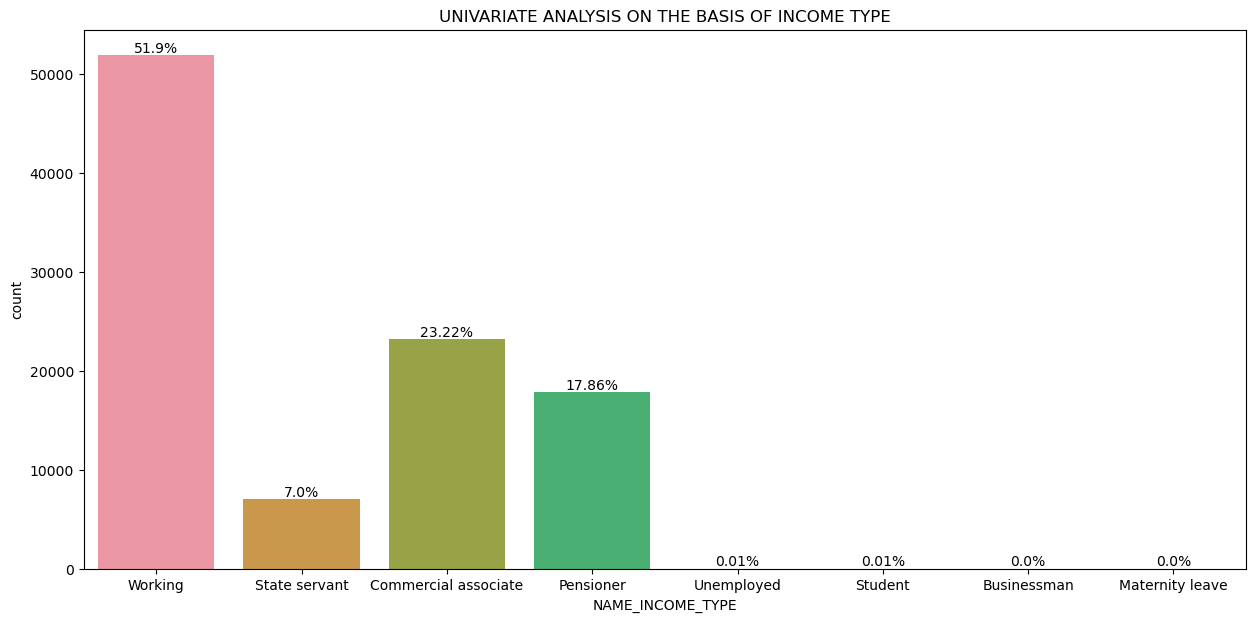

In [23]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title("UNIVARIATE ANALYSIS ON THE BASIS OF INCOME TYPE")
sns.countplot(x=df["NAME_INCOME_TYPE"])
bar_percentage(ax, len(df)) 
plt.show()

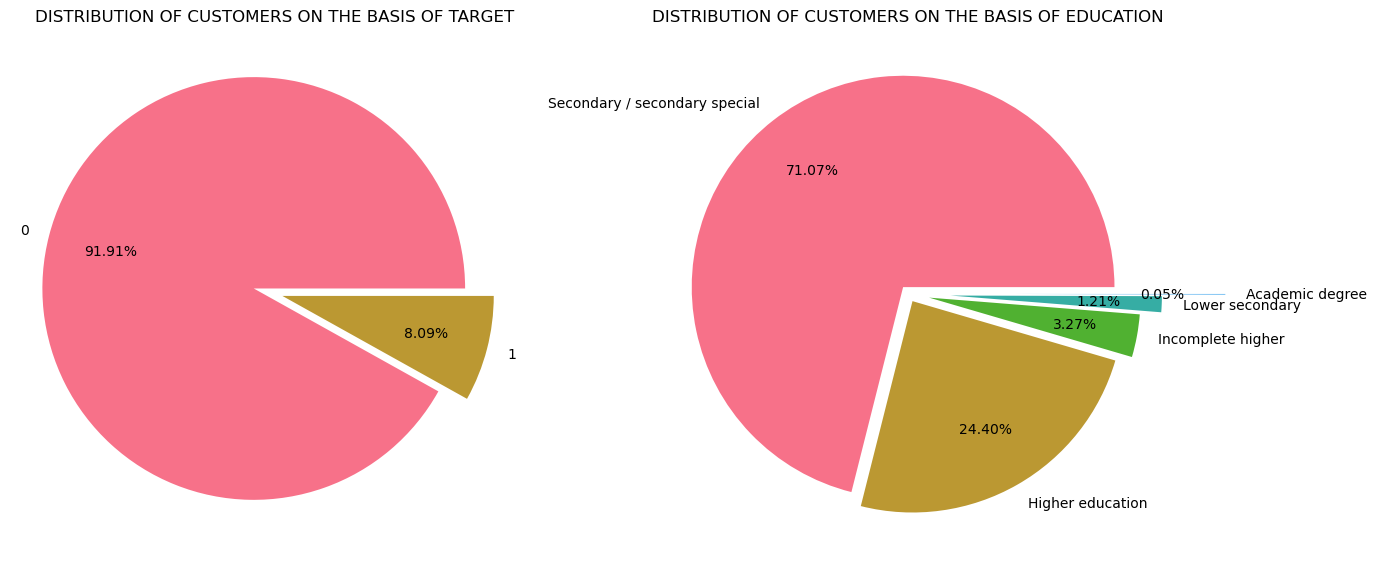

In [24]:
fig, ax = plt.subplots(1,2,figsize = (15 ,7))
ax[1].set_title("DISTRIBUTION OF CUSTOMERS ON THE BASIS OF EDUCATION")
percentage1 = df["NAME_EDUCATION_TYPE"].value_counts()        
labels1 = list(df["NAME_EDUCATION_TYPE"].value_counts().index) 
ax[1].pie(percentage1,labels = labels1, autopct= "%0.2f%%", explode=[0.04,0.04,0.1,0.2,0.5], pctdistance=0.7) 


ax[0].set_title("DISTRIBUTION OF CUSTOMERS ON THE BASIS OF TARGET")
percentage2 = df["TARGET"].value_counts()        
labels2 = list(df["TARGET"].value_counts().index) 
ax[0].pie(percentage2,labels = labels2, autopct= "%0.2f%%", explode=[0.1,0.04], pctdistance=0.7) 
plt.show()


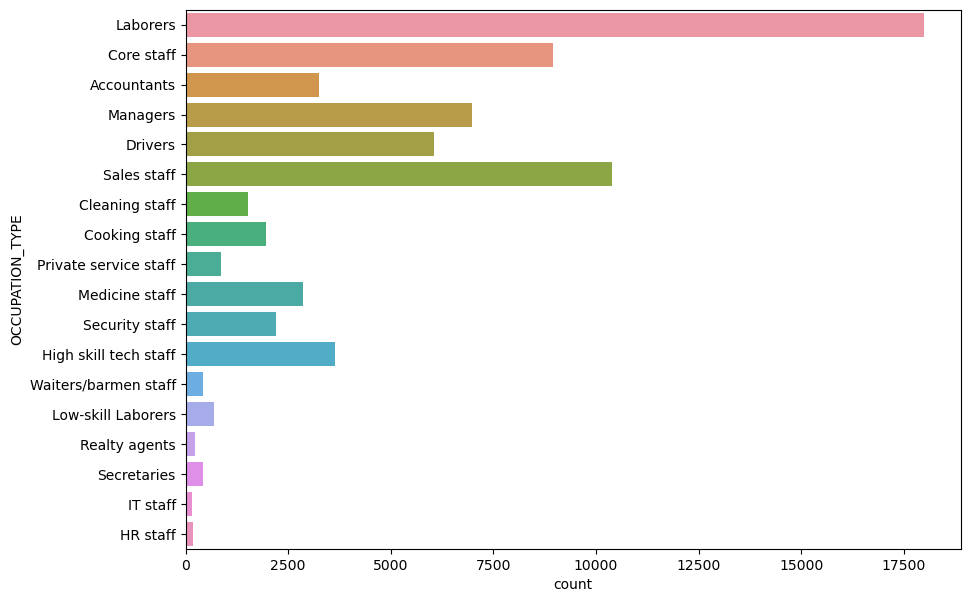

In [25]:

fig, ax = plt.subplots(figsize = (10,7))
sns.countplot(y=df["OCCUPATION_TYPE"])

plt.show()

# INTERPRETATION--For univariate analysis of categorical columns
1. There are less number of revolving loans as compared to cash loans.​

2. More number females ie 65%  than males 35% .​

3. On the basis of income type , working type are in majority then commercial associate, and pensioners and state govt. 

4. Unemployed, student , businessman, maternity leave are very nominal .
5. Labourers are maximum in numbers , then sales, core staff, managers and drivers.​

6. People from IT staff, HR staff, secretaries, reality agents are the least.​

7. Mostly people have secondary education at 71%., then higher education at 24 % ​

8. People with academic education and lower education is l very least in number.

# $$\;\;\;\;\;\;Univariate \ Analysis \ of \ Numerical \ Variables$$

LEVEL 1 Analysis of Numerical Columns
----------------------------------------------------------
Check if the data is discrete or continuous. \
Measure the central tendency (mean, median, mode) \
Measure the dispersion values \
Check for missing values \
Checking for skewness\
Check for outliers \
Think about how the missing values could be treated. \
Think about the kind of graph/chart that can be plotted using this data.

## User defined function for calculating mean, median, mode,  standard deviation, and count of all null values 

In [26]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [27]:
info_of_numerical("TARGET")

The mean of the TARGET is 0.08093
The median of the TARGET is 0.0
The mode of the TARGET is 0
The standard deviation of the TARGET is 0.2727289476951945
Number of missing values in the TARGET is 0


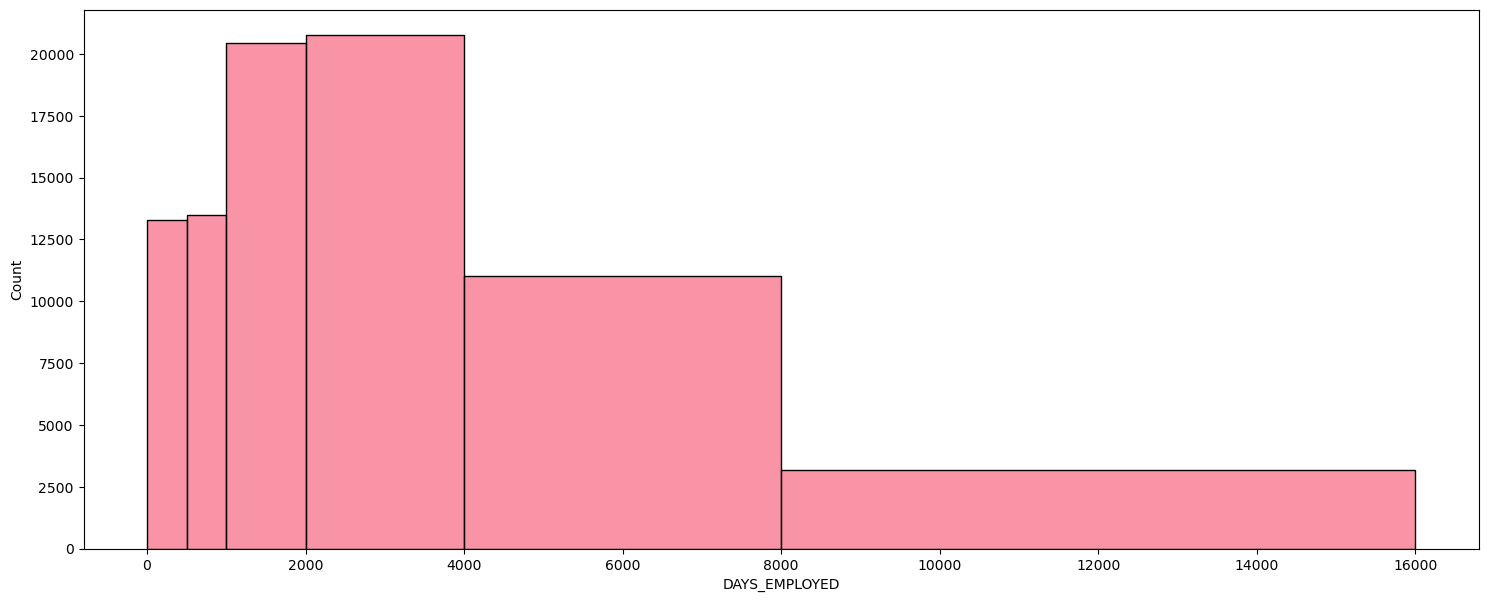

In [28]:
fig, ax = plt.subplots(figsize= (18, 7))
bins=(0,500,1000,2000,4000,8000, 16000)
sns.histplot(x = df['DAYS_EMPLOYED'], data=df, bins=bins)

plt.show()

The mean of the AMT_CREDIT is 599003.4465
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 402051.9591213264
Number of missing values in the AMT_CREDIT is 0


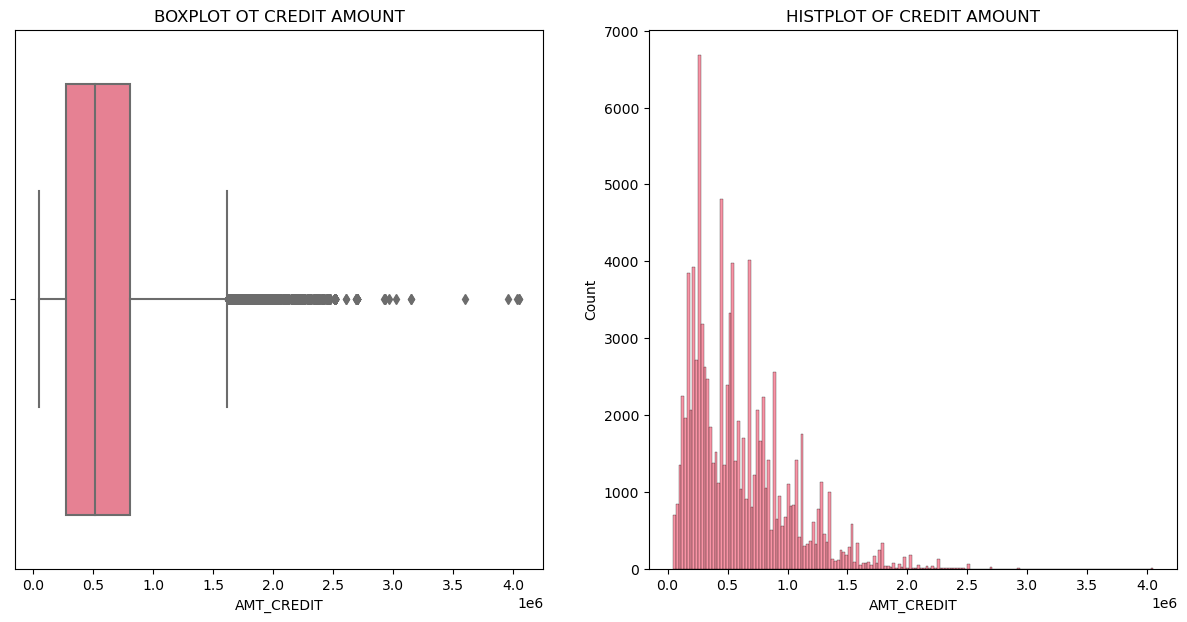

In [29]:
info_of_numerical("AMT_CREDIT")

fig, ax = plt.subplots(1, 2, figsize= (15, 7))
ax[0].set_title("BOXPLOT OT CREDIT AMOUNT")
ax[1].set_title("HISTPLOT OF CREDIT AMOUNT")
sns.histplot(x = df['AMT_CREDIT'], ax=ax[1])                                                                                           
sns.boxplot(x = df['AMT_CREDIT'], ax = ax[0])
plt.show()

# INTERPRETATION-- For univariate analysis of numerical columns

1. Majority of data for credit amount is between 2.5 to 7.5 lakhs , mean value is 6 lakhs approx.
2. A lot of outliers are there after 16 lakhs , which shows large  credit amount has been given which needs to be analysed for both defaulters and non defaulters and conditions on the basis of which loan is dispensed. 

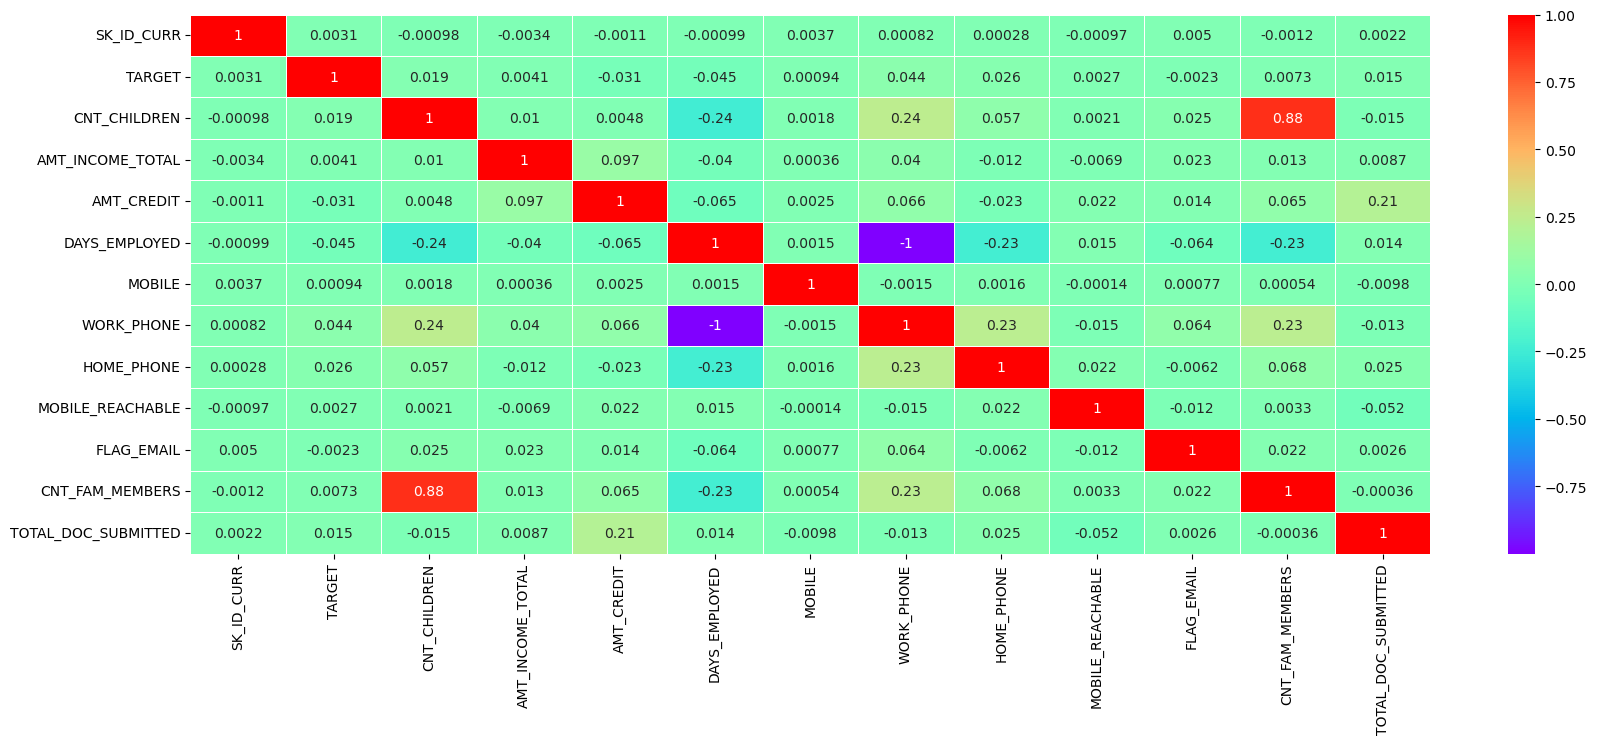

In [30]:
fig, ax=plt.subplots(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cbar=0.5, linewidth=0.5, cmap="rainbow")
plt.show()

# Interprertation---
from the above heat map .
1. There is strong correlation between amount of goods price and credit amount and number of children and number of family members.
2. There is negative correlation between work phone and days employed.

note we will try to use these correlations in our analysis.

# Task---) Bivariate and  multivariate analysis 

# for bivariate and multivariate analysis i am dividing the credit into groups

1. l1= credit upto 5 lakhs
2. l2= credit from 5 lakhs  - 10lakhs
3. l3= credit from 10 lakhs - 20lakhs
4. l4= credit from 20 lakhs and above

In [31]:
l1 = df[df["AMT_CREDIT"]<=500000]
l1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,454500.0,...,1588,1,1,1,1,0,Laborers,2.0,WEDNESDAY,1
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,405000.0,...,2019,1,1,0,1,0,Laborers,1.0,THURSDAY,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,216083,0,Cash loans,F,N,N,0,81000.0,486459.0,342000.0,...,574,1,1,0,1,0,High skill tech staff,2.0,WEDNESDAY,1
99993,216084,0,Revolving loans,F,N,N,0,90000.0,180000.0,180000.0,...,491,1,1,1,1,0,Core staff,1.0,TUESDAY,0
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


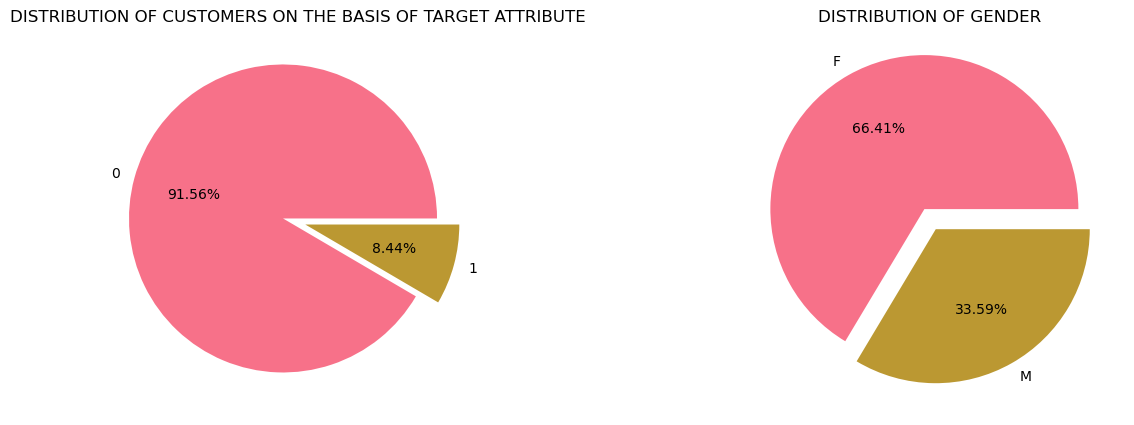

In [32]:

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].set_title("DISTRIBUTION OF CUSTOMERS ON THE BASIS OF TARGET ATTRIBUTE")
ax[1].set_title("DISTRIBUTION OF GENDER ")
percentage = l1["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(l1["TARGET"].value_counts().index) # Converting the index of value counts into list
ax[0].pie(percentage,labels = labels, autopct= "%0.2f%%",explode=[0.1,0.05])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

percentage1 = l1["GENDER"].value_counts()        
labels1 = list(l1["GENDER"].value_counts().index) 
ax[1].pie(percentage1,labels = labels1, autopct= "%0.2f%%",explode=[0.1,0.05] ) 
plt.show()

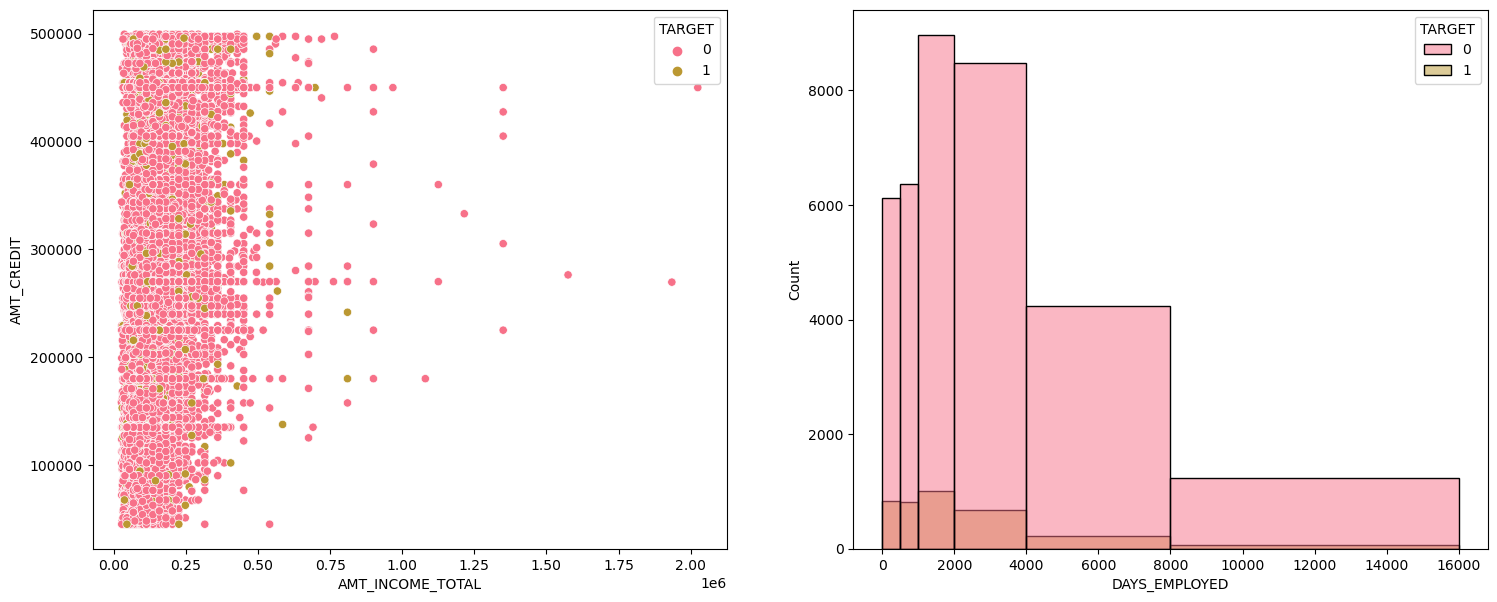

In [33]:
fig, ax = plt.subplots(1,2,figsize= (18, 7))
sns.scatterplot(x = l1['AMT_INCOME_TOTAL'], y = l1['AMT_CREDIT'], hue="TARGET", data=l1, ax=ax[0])

bins=(0,500,1000,2000,4000,8000, 16000)
sns.histplot(x = l1['DAYS_EMPLOYED'], hue= l1['TARGET'],bins=bins, data=l1, ax=ax[1])
plt.show()

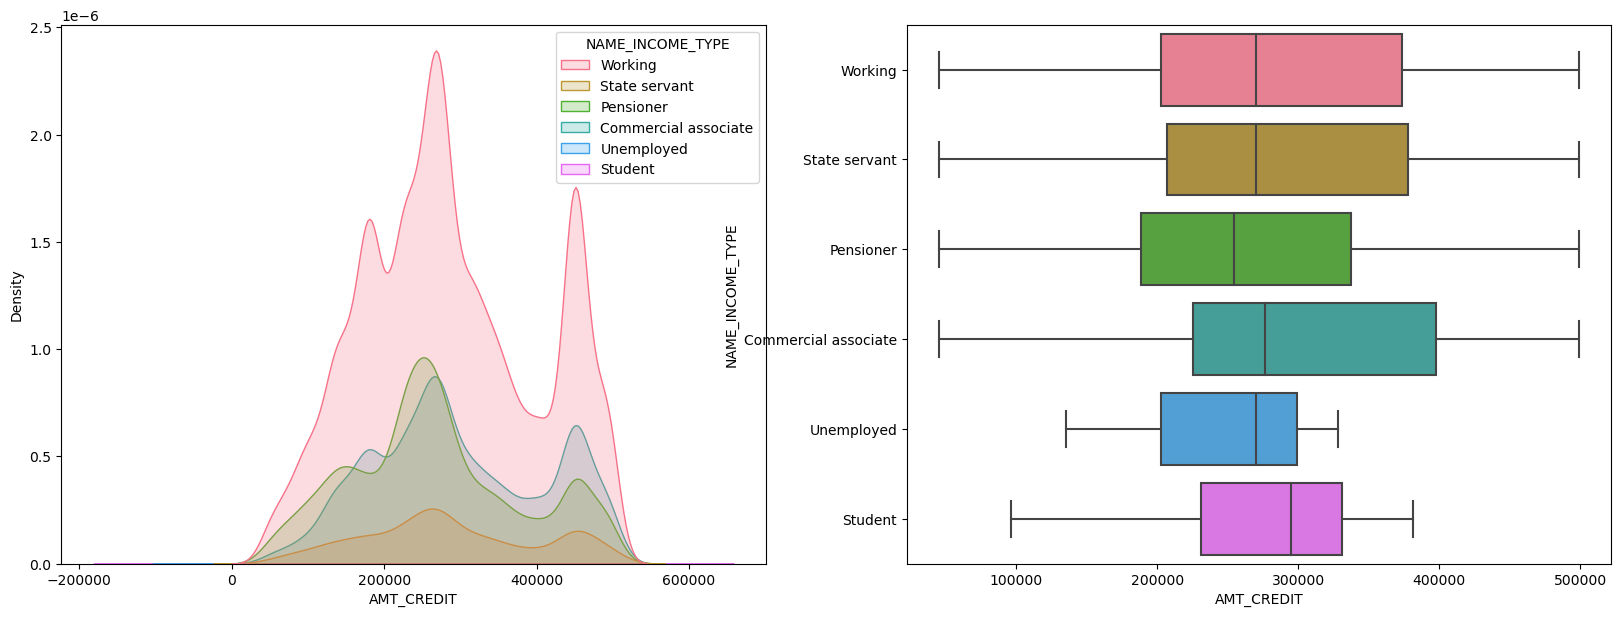

In [34]:
fig, ax = plt.subplots(1,2,figsize= (20, 7))
sns.set_palette("husl")
sns.boxplot(x = l1['AMT_CREDIT'], y="NAME_INCOME_TYPE", data=l1,  ax=ax[1])
sns.kdeplot(x = l1['AMT_CREDIT'], hue="NAME_INCOME_TYPE", data=l1,  ax=ax[0], shade=True)

plt.show()

# ***Interpretation---

1. There is good relationship between the credit amount and income , with increase in income , credit also grows.
2. On the basis of type of income the credit kde plot is having a normal distribution where most people have taken credit of 2-4 lakhs , majority of people belong to working and pensioner type.
3. Mostly people have working , pensioner and commercial associate.​

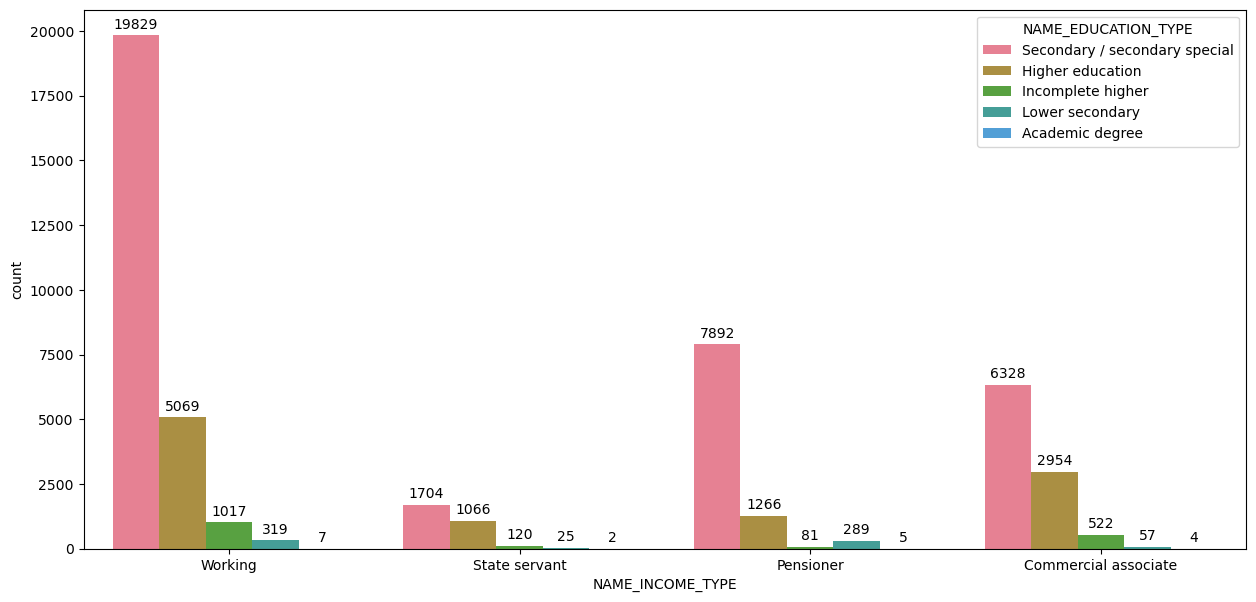

In [35]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x=l1["NAME_INCOME_TYPE"][l1["NAME_INCOME_TYPE"].isin(['Working', 'State servant', 'Pensioner', 'Commercial associate'])], hue=l1["NAME_EDUCATION_TYPE"] )
bar_count(ax,l1)
plt.show()

In [36]:
gH=pd.pivot_table(index="NAME_INCOME_TYPE", values="AMT_INCOME_TOTAL",columns=["NAME_EDUCATION_TYPE", "TARGET"], aggfunc="count", data=l1)
gH.fillna(value=0, inplace=True)
gH

NAME_EDUCATION_TYPE  Academic degree Higher education         \
TARGET                             0                0      1   
NAME_INCOME_TYPE                                               
Commercial associate             4.0           2797.0  157.0   
Pensioner                        5.0           1218.0   48.0   
State servant                    2.0           1023.0   43.0   
Student                          0.0              2.0    0.0   
Unemployed                       0.0              0.0    0.0   
Working                          7.0           4760.0  309.0   

NAME_EDUCATION_TYPE  Incomplete higher       Lower secondary        \
TARGET                               0     1               0     1   
NAME_INCOME_TYPE                                                     
Commercial associate             481.0  41.0            49.0   8.0   
Pensioner                         78.0   3.0           271.0  18.0   
State servant                    116.0   4.0            23.0   2.0   
Student                            0.0   0.0             0.0   0.0   
Unemployed                         1.0   0.0             0.0   0.0   
Working                          934.0  83.0           268.0  51.0   

NAME_EDUCATION_TYPE  Secondary / secondary special          
TARGET                                           0       1  
NAME_INCOME_TYPE                                            
Commercial associate                        5761.0   567.0  
Pensioner                                   7475.0   417.0  
State servant                               1571.0   133.0  
Student                                        2.0     0.0  
Unemployed                                     1.0     1.0  
Working                                    17616.0  2213.0

# Interpretation---

4. On the basis of type of income the people with secondary education and higher education are more compared to others.​

From the table below – 
​People with academic degree are not likely to default for credit up-to 5 lakhs and very few people have taken credit for this band.
​Majority of people have secondary education and their probability to default is highest for each income type.​

​People with Higher education or incomplete higher education for all income groups are less likely to default .​

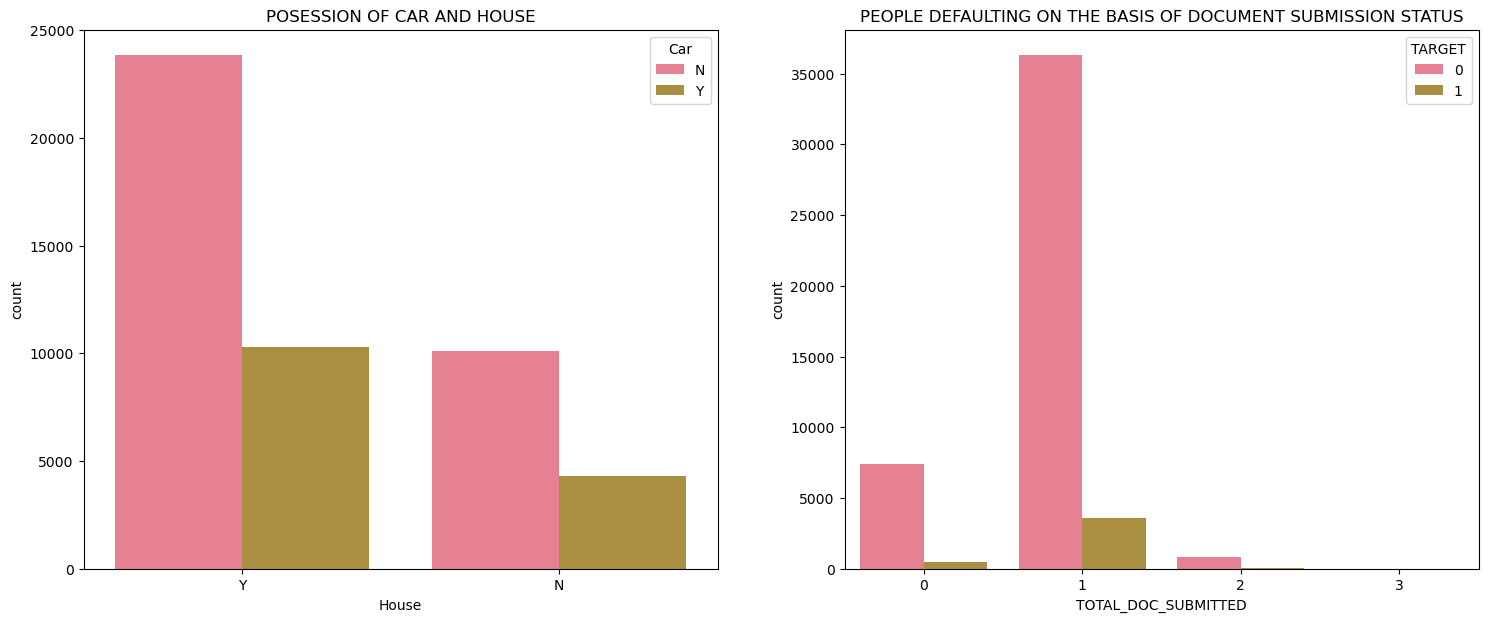

In [37]:
fig, ax = plt.subplots(1,2,figsize= (18, 7))
ax[0].set_title("POSESSION OF CAR AND HOUSE")
ax[1].set_title("PEOPLE DEFAULTING ON THE BASIS OF DOCUMENT SUBMISSION STATUS")
sns.countplot(x = l1['House'], hue = l1['Car'], data=l1, ax=ax[0])

sns.countplot(x = l1['TOTAL_DOC_SUBMITTED'], hue = l1['TARGET'], data=l1, ax=ax[1])

plt.show()

In [38]:
gg=pd.pivot_table(index="Car", values="AMT_INCOME_TOTAL",columns=["House", "TARGET"], aggfunc=["count"], data=l1)
gg


count                  
House      N           Y      
TARGET     0    1      0     1
Car                           
N       9136  959  21803  2036
Y       3994  332   9532   771

# Interpretation---

People who doesn’t owns a house and don’t have a car are more likely to default.​

People who have a car and a house are least  likely to default.​

People who have a car but don’t  have  a house are  less likely to default.​

People who don’t have a car but have a house are also less likely to default.​

Majority of people have submitted a single document for getting credit , some of them are defaulters.​

People who have submitted 2 documents have not defaulted.

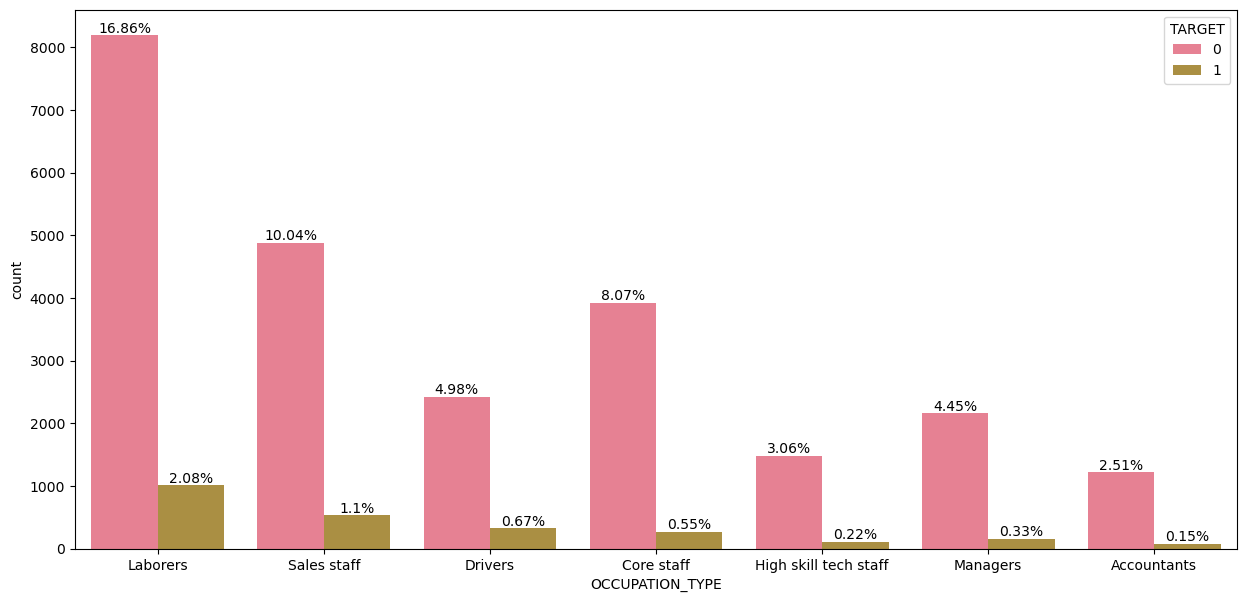

In [39]:
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x=l1["OCCUPATION_TYPE"][l1["OCCUPATION_TYPE"].isin(['Core staff', 'High skill tech staff','Accountants',
       'Sales staff', 'Managers', 'Laborers',
       'Drivers',])], hue="TARGET", data=l1)
bar_percentage(ax, len(l1))
plt.show()

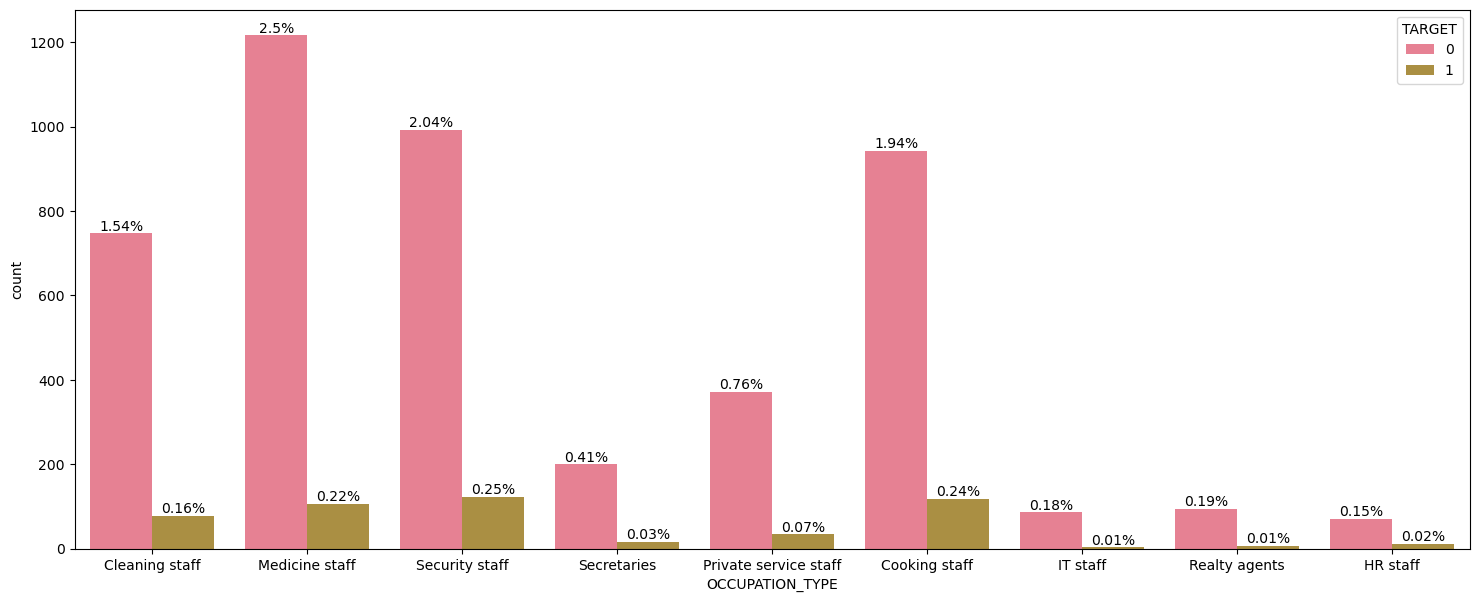

In [40]:
fig, ax = plt.subplots(figsize = (18,7))
sns.countplot(x=l1["OCCUPATION_TYPE"][l1["OCCUPATION_TYPE"].isin(['Private service staff',
       'Medicine staff', 'Security staff', 'Realty agents',
       'IT staff', 'Secretaries', 'Cleaning staff', 'Cooking staff',
       'HR staff'])], hue="TARGET", data=l1)
bar_percentage(ax, len(l1))
plt.show()

In [41]:
pp=pd.pivot_table(index="OCCUPATION_TYPE", values="AMT_INCOME_TOTAL",columns=["TARGET"], aggfunc="count", data=l1)
pp["probability"] = pp[1] / (pp[0]+pp[1])
pp=pp.sort_values( by="probability", ascending=False)
pp

TARGET,0,1,probability
OCCUPATION_TYPE,,,
Low-skill Laborers,367,77,0.173423
HR staff,71,11,0.134146
Drivers,2419,325,0.118440
Waiters/barmen staff,225,30,0.117647
Cooking staff,943,118,0.111216
Security staff,992,123,0.110314
Laborers,8188,1009,0.109710
Sales staff,4877,534,0.098688
Cleaning staff,747,77,0.093447


# ***Interpretation---

Majority of people have occupation as labourers, sales, drivers, core staff, high tech skills , managers and accountants.​

Majority of defaulters for credit up-to 5 lakhs are laborers, sales, drivers, core staff. ​

People belonging to other occupations are less probable to default. ​

People belonging to IT staff, HR staff , secretaries, realty agents have not defaulted .



#  Credit limit greater than 5 lakhs and less than 10 lakhs


In [42]:

l2 = df[(df["AMT_CREDIT"]>500000) & (df["AMT_CREDIT"]<=1000000)]
l2=l2[l2["NAME_INCOME_TYPE"].isin(['State servant', 'Commercial associate', 'Pensioner', 'Working'])]
l2

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,652500.0,...,679,1,1,0,1,0,Core staff,3.0,SATURDAY,1
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,697500.0,...,3028,1,1,0,1,0,Drivers,3.0,THURSDAY,1
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,679500.0,...,203,1,1,0,1,0,Laborers,2.0,MONDAY,1
16,100020,0,Cash loans,M,N,N,0,108000.0,509602.5,387000.0,...,1317,1,1,0,1,0,Drivers,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,216077,0,Cash loans,M,N,Y,0,135000.0,540000.0,540000.0,...,4242,1,1,0,1,0,Managers,2.0,TUESDAY,1
99987,216078,0,Cash loans,M,N,N,1,135000.0,640080.0,450000.0,...,3468,1,1,0,1,0,NaN,2.0,FRIDAY,1
99988,216079,0,Cash loans,M,N,Y,2,135000.0,974794.5,841500.0,...,315,1,1,0,1,0,Laborers,4.0,FRIDAY,1
99994,216085,0,Cash loans,M,Y,N,0,225000.0,612000.0,612000.0,...,135,1,1,0,1,0,Laborers,2.0,SATURDAY,1


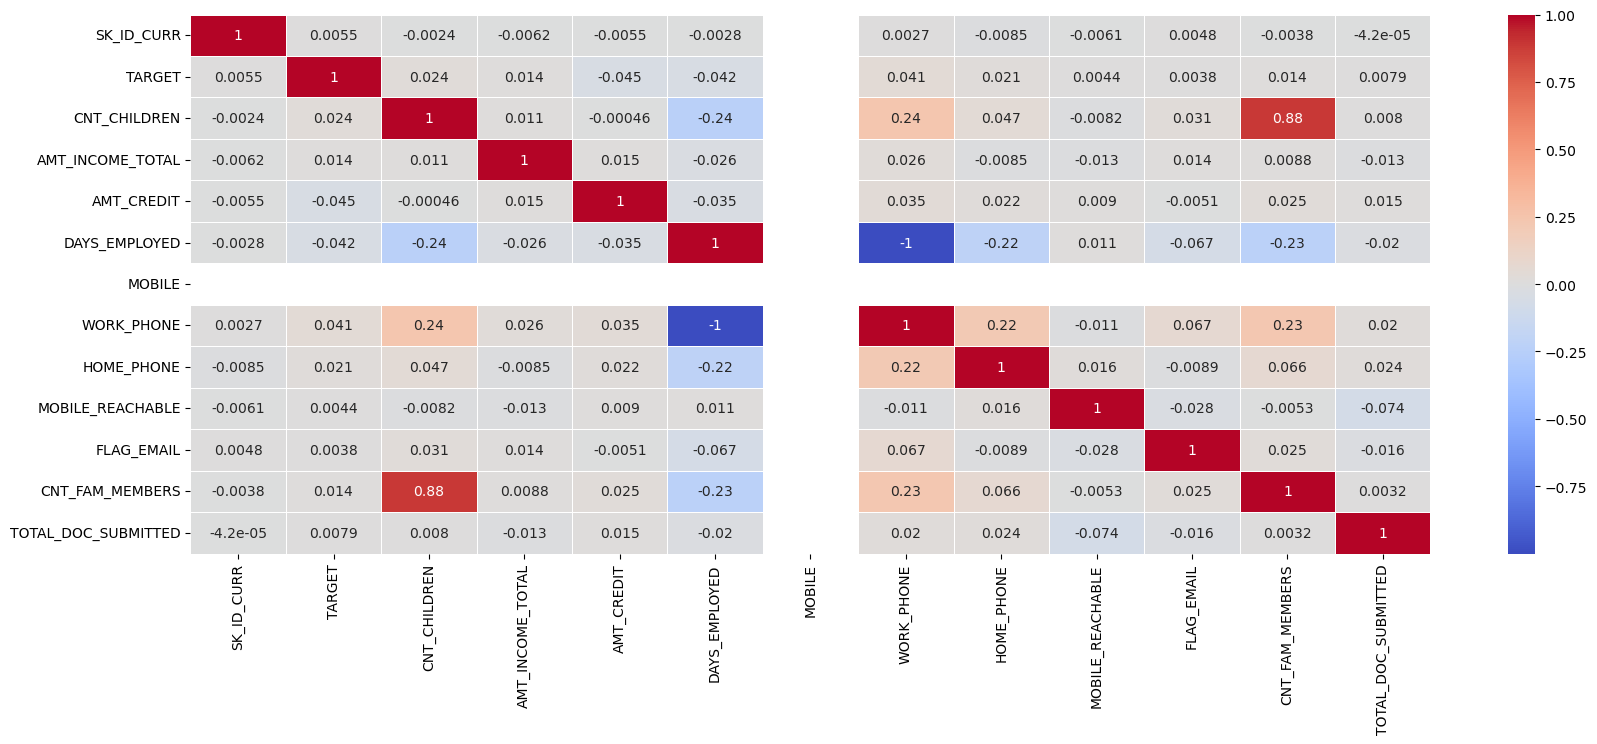

In [43]:
fig, ax=plt.subplots(figsize=(20,7))
sns.heatmap(l2.corr(), annot=True, cbar=0.5, linewidth=0.5, cmap="coolwarm")
plt.show()

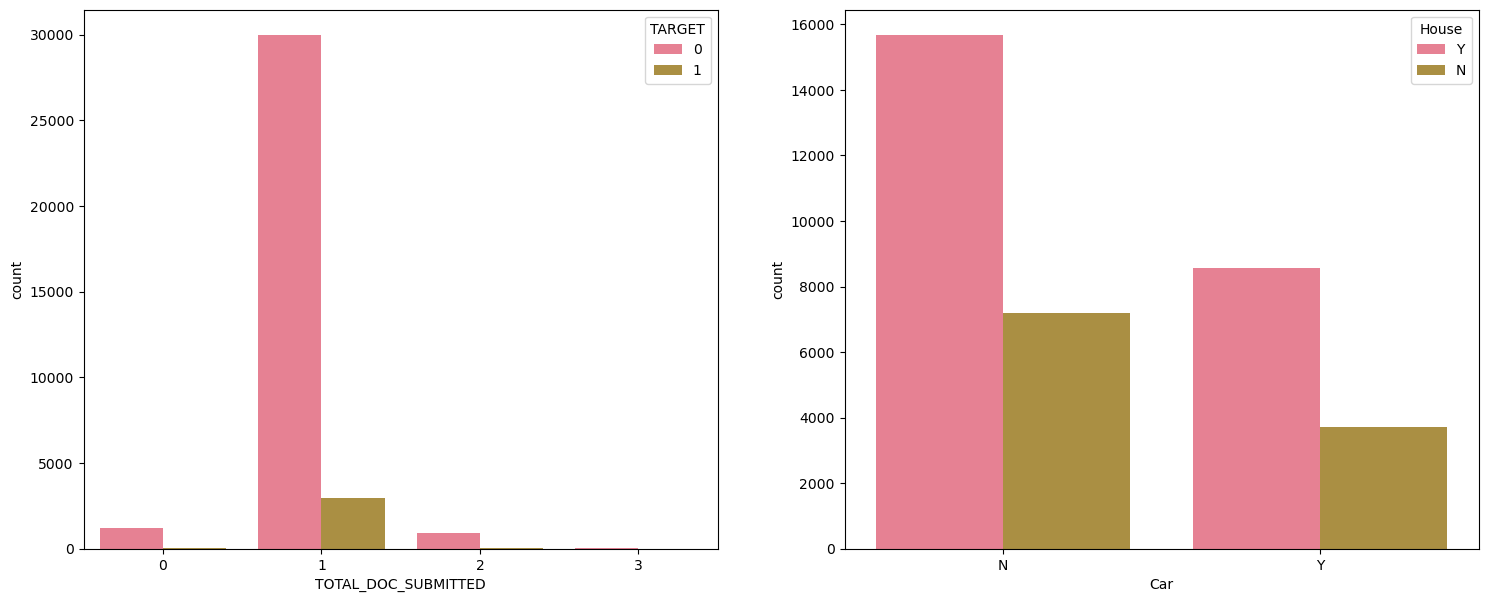

In [44]:
fig, ax = plt.subplots(1,2,figsize= (18, 7))
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data=l2, ax=ax[0])
sns.countplot(x = "Car", hue = "House", data=l2, ax=ax[1])

plt.show()

In [45]:
gg=pd.pivot_table(index="Car", values="AMT_INCOME_TOTAL",columns=["House", "TARGET"], aggfunc="count", data=l2)
gg



House      N           Y      
TARGET     0    1      0     1
Car                           
N       6525  656  14276  1388
Y       3424  301   7853   712

# Interpretation--​​

People who doesn’t owns a house and don’t have a car are more likely to default.​​

People who have a car and a house are least  likely to default.​​

People who have a car but don’t  have  a house are  less likely to default.​​

People who don’t have a car but have a house are also less likely to default.​​

Majority of people have submitted a single document for getting credit , some of them are defaulters.​​

People who have submitted 2 documents have not defaulted.

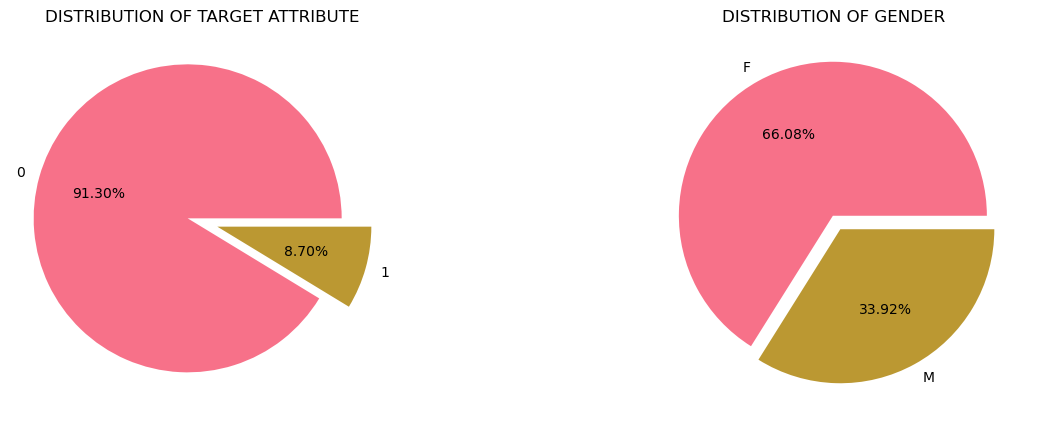

In [46]:
sns.set_palette("husl")

fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].set_title("DISTRIBUTION OF TARGET ATTRIBUTE")
ax[1].set_title("DISTRIBUTION OF GENDER ")
percentage = l2["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(l2["TARGET"].value_counts().index) # Converting the index of value counts into list
ax[0].pie(percentage,labels = labels, autopct= "%0.2f%%", explode=[0.1,0.1] )
# autopct: to print the percentage on pie wedge. 2 decimal points used 

percentage1 = l2["GENDER"].value_counts()        
labels1 = list(l2["GENDER"].value_counts().index) 
ax[1].pie(percentage1,labels = labels1, autopct= "%0.2f%%",explode=[0.05,0.05] ) 
plt.show()

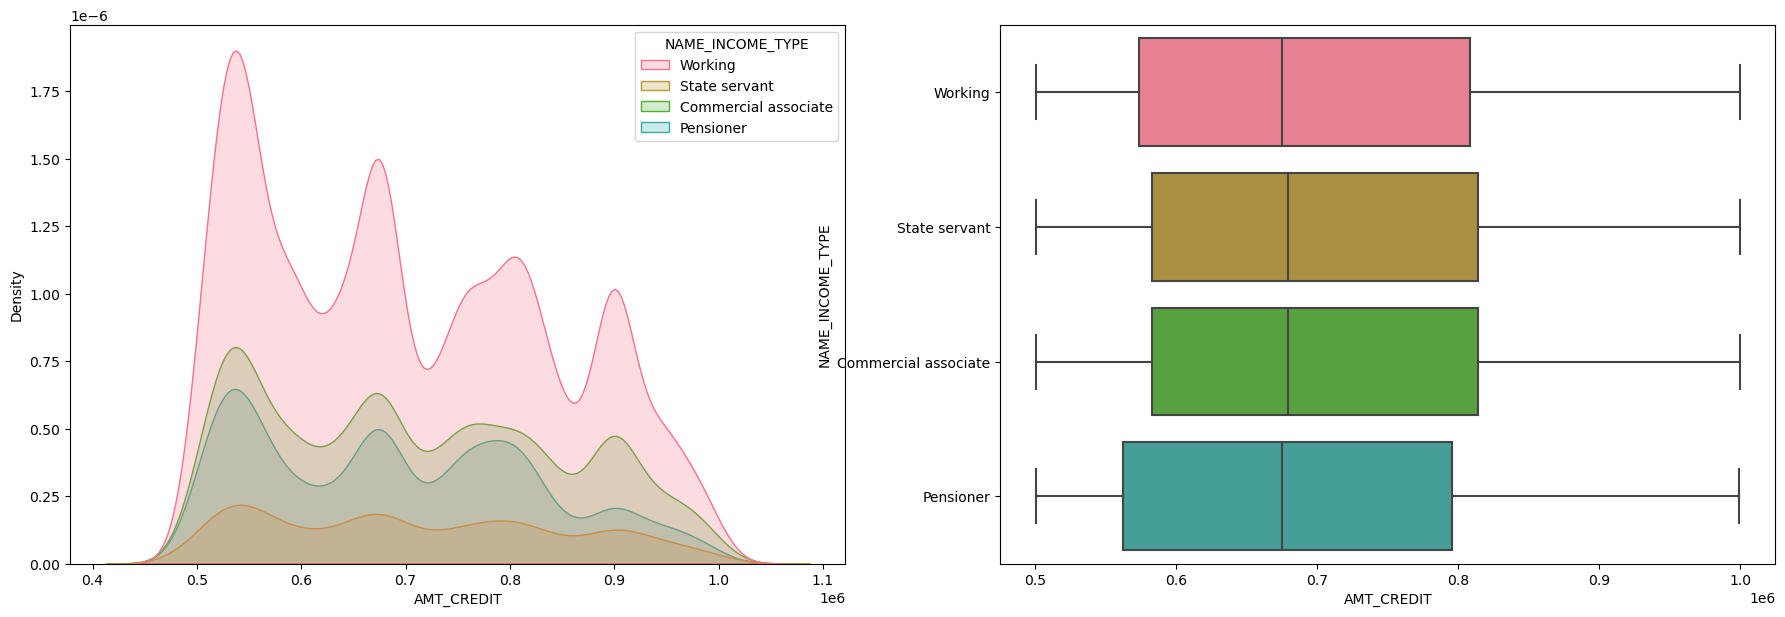

In [47]:

fig, ax = plt.subplots(1,2,figsize= (22, 7))

sns.boxplot(x = "AMT_CREDIT", y="NAME_INCOME_TYPE", data=l2,  ax=ax[1])
sns.kdeplot(x = "AMT_CREDIT", hue="NAME_INCOME_TYPE", data=l2,  ax=ax[0], shade=True)

plt.show()

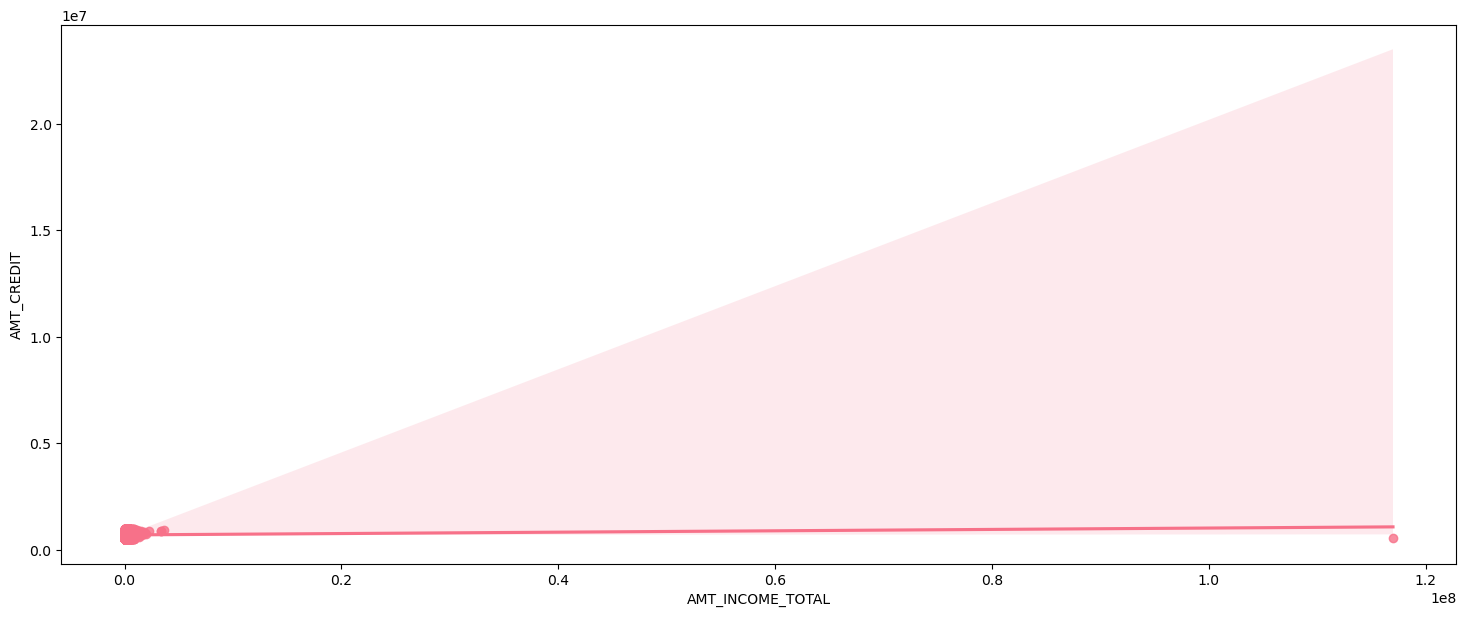

In [48]:
fig, ax = plt.subplots(figsize= (18, 7))
sns.regplot(x = l2['AMT_INCOME_TOTAL'], y = l2['AMT_CREDIT'], data=l2)

plt.show()

# Note :-- there was some value which was very large and at an abnormal distance from the mean , so removing that value only for appropriate analysis

In [49]:
l2 = l2.drop(l2[l2["AMT_INCOME_TOTAL"] == l2["AMT_INCOME_TOTAL"].max()].index)

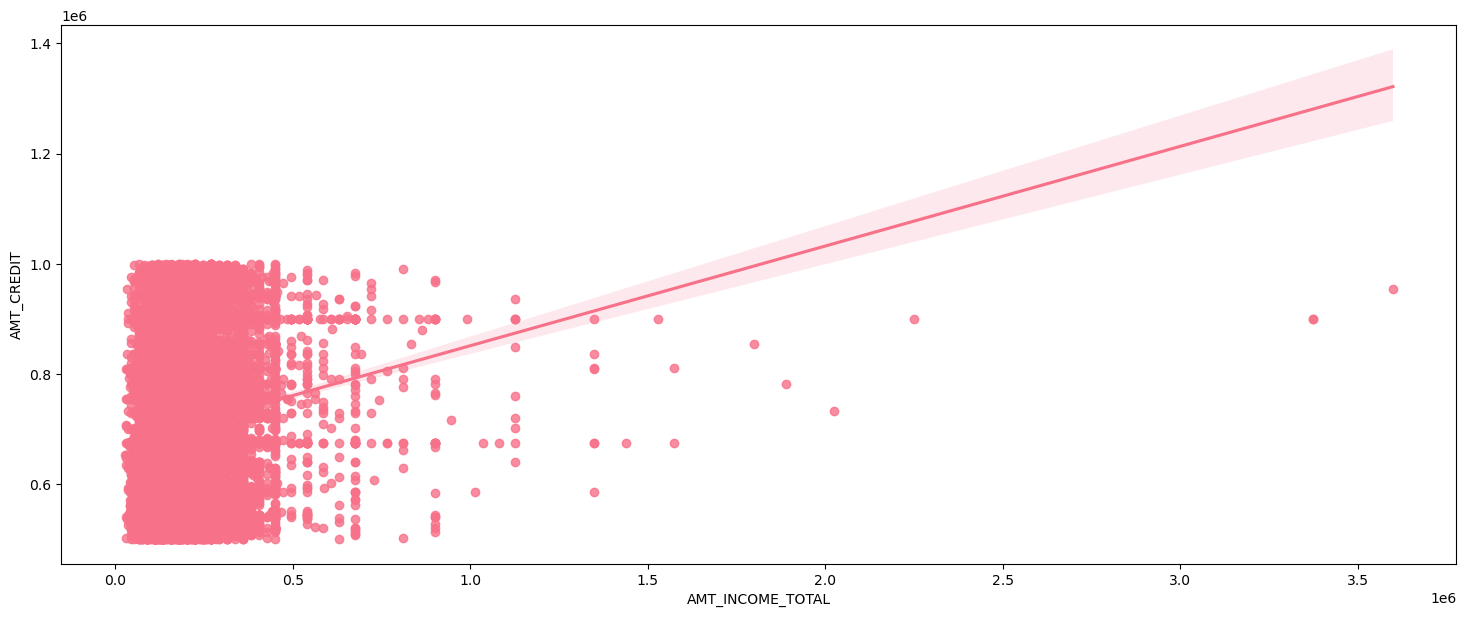

In [50]:
fig, ax = plt.subplots(figsize= (18, 7))
sns.regplot(x = l2['AMT_INCOME_TOTAL'], y = l2['AMT_CREDIT'], data=l2)

plt.show()

# Interpretation---​

The kde plot for credit amount is positively skewed for credit between 5 to 10 lakhs. ​

The data is spreaded more and has several peaks at 5.5, 6.8, 8.0,9.0 ​

People belonging to working income type is the highest and pensioner is the least . ​

Relationship between credit and income is directly proportional .​

Majority of people have income less than 50,000 .​

​

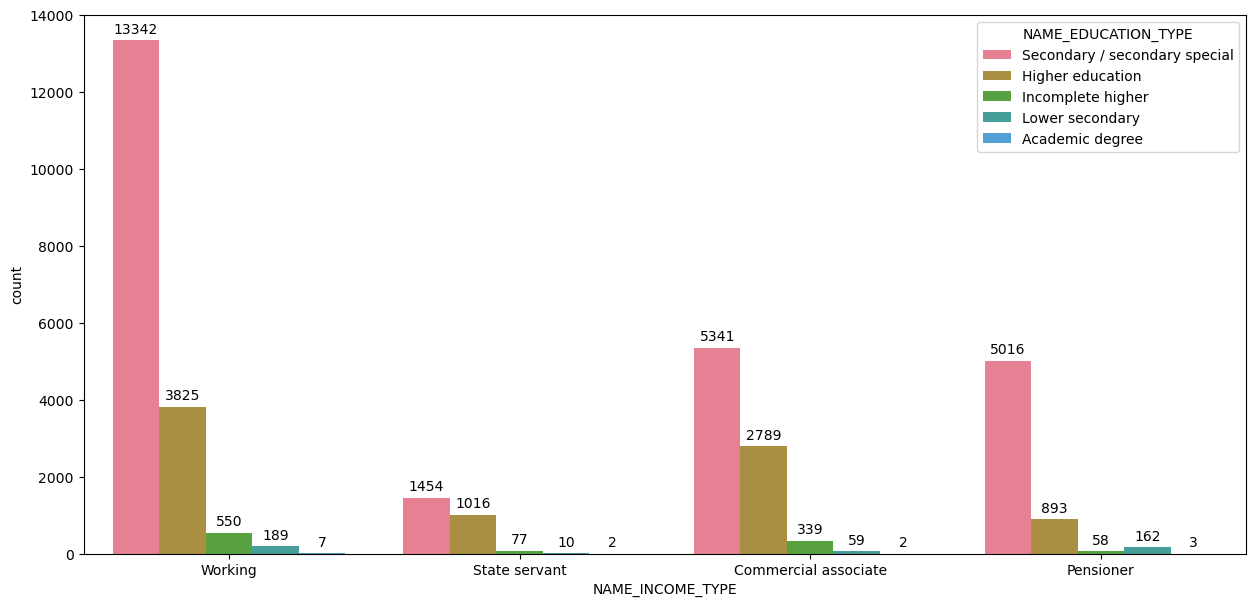

In [51]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x=l2["NAME_INCOME_TYPE"], hue=l2["NAME_EDUCATION_TYPE"])
bar_count(ax, l2)
plt.show()

In [52]:
gH=pd.pivot_table(index="NAME_INCOME_TYPE", values="AMT_INCOME_TOTAL",columns=["NAME_EDUCATION_TYPE", "TARGET"], aggfunc="count", data=l2)
gH.fillna(value=0, inplace=True)
gH


NAME_EDUCATION_TYPE  Academic degree      Higher education         \
TARGET                             0    1                0      1   
NAME_INCOME_TYPE                                                    
Commercial associate             2.0  0.0           2632.0  157.0   
Pensioner                        3.0  0.0            836.0   57.0   
State servant                    2.0  0.0            969.0   47.0   
Working                          6.0  1.0           3573.0  252.0   

NAME_EDUCATION_TYPE  Incomplete higher       Lower secondary        \
TARGET                               0     1               0     1   
NAME_INCOME_TYPE                                                     
Commercial associate             297.0  42.0            47.0  12.0   
Pensioner                         57.0   1.0           149.0  13.0   
State servant                     70.0   7.0             8.0   2.0   
Working                          495.0  55.0           160.0  29.0   

NAME_EDUCATION_TYPE  Secondary / secondary special          
TARGET                                           0       1  
NAME_INCOME_TYPE                                            
Commercial associate                        4846.0   495.0  
Pensioner                                   4709.0   307.0  
State servant                               1355.0    99.0  
Working                                    11862.0  1480.0

# Interpretation---​

People whose income type is working and has education as secondary education is the highest for credit band. ​

Very less number of people have academic degree and none of them are defaulters.​

People who have higher education or incomplete education and belong to pensioner and state servant type are very less defaulting​

Commercial associate For each education type are defaulting  more .​

People whom are commercial associate and working with secondary education are more likely to default. ​

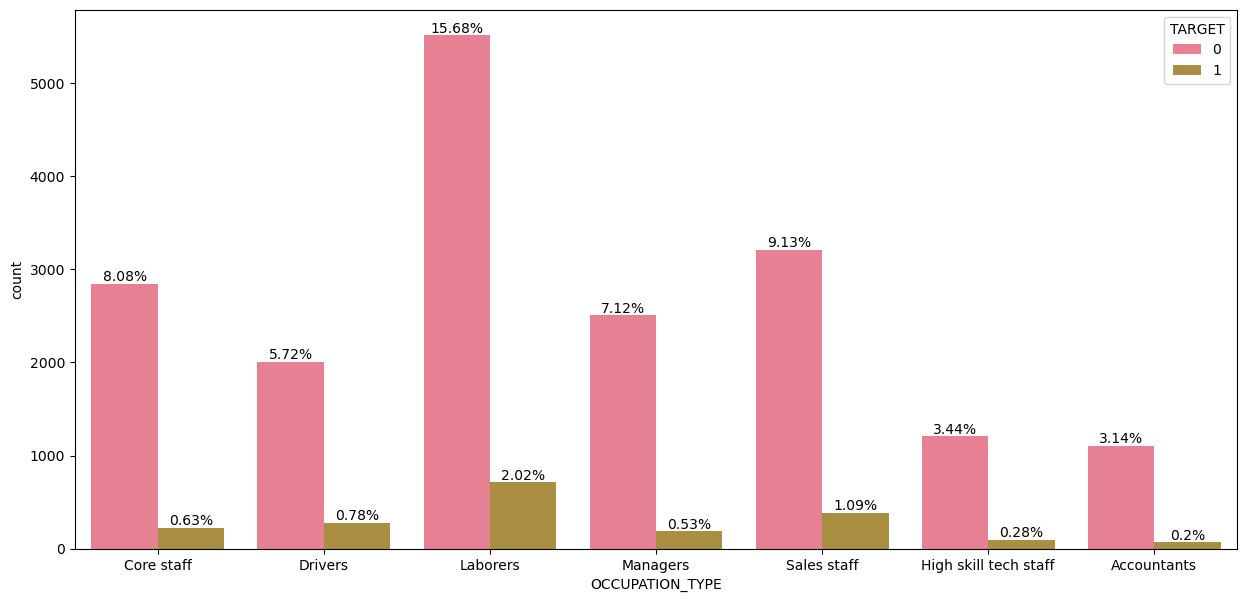

In [53]:
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x=l2["OCCUPATION_TYPE"][l2["OCCUPATION_TYPE"].isin(['Core staff', 'High skill tech staff','Accountants',
       'Sales staff', 'Managers', 'Laborers',
       'Drivers',])], hue="TARGET", data=l2)
bar_percentage(ax, len(l2))
plt.show()


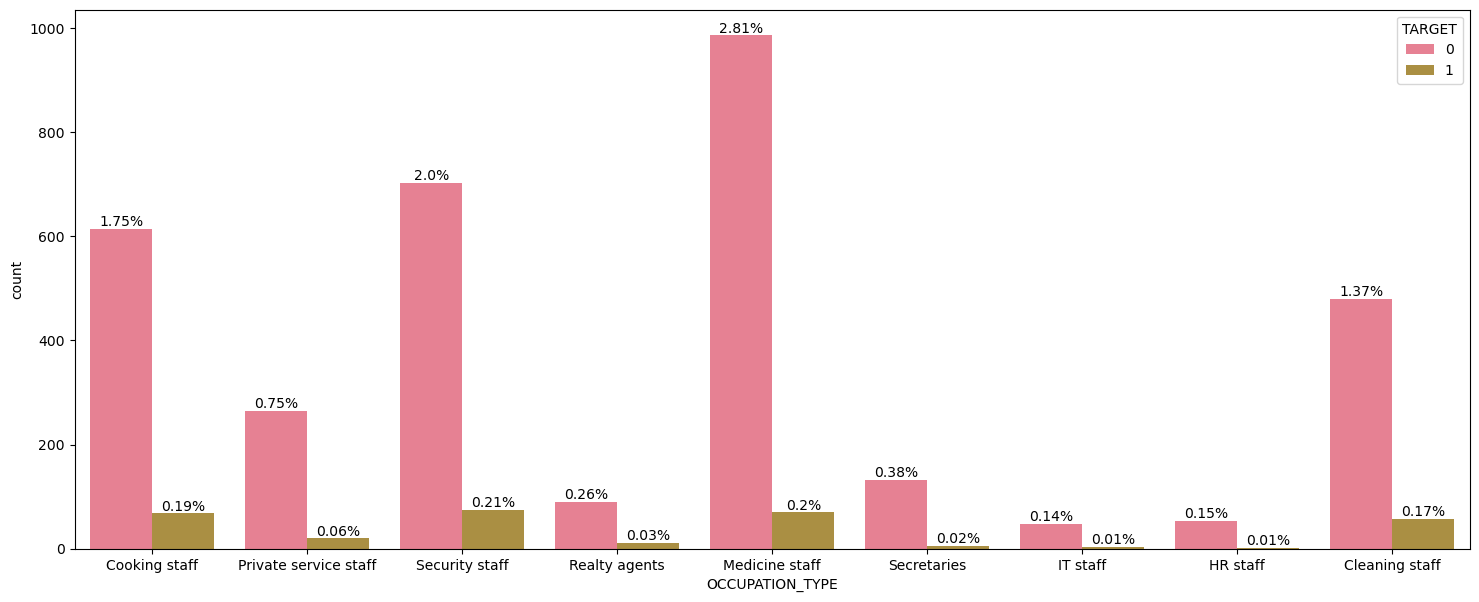

In [54]:
fig, ax = plt.subplots(figsize = (18,7))
sns.countplot(x=l2["OCCUPATION_TYPE"][l2["OCCUPATION_TYPE"].isin(['Private service staff',
       'Medicine staff', 'Security staff', 'Realty agents',
       'IT staff', 'Secretaries', 'Cleaning staff', 'Cooking staff',
       'HR staff'])], hue="TARGET", data=l2)
bar_percentage(ax, len(l2))
plt.show()

In [55]:

pp=pd.pivot_table(index="OCCUPATION_TYPE", values="AMT_INCOME_TOTAL",columns=["TARGET"], aggfunc="count", data=l2)
pp["probability"] = pp[1] / (pp[0]+pp[1])
pp=pp.sort_values(by= "probability", ascending=False)
pp

TARGET,0,1,probability
OCCUPATION_TYPE,,,
Low-skill Laborers,171,34,0.165854
Drivers,2009,274,0.120018
Laborers,5509,711,0.114309
Waiters/barmen staff,118,15,0.112782
Realty agents,90,11,0.108911
Cleaning staff,480,58,0.107807
Sales staff,3208,384,0.106904
Cooking staff,614,68,0.099707
Security staff,703,74,0.095238


# Interpretation---​

​

Majority of people have occupation as labourers, sales, drivers, core staff, high tech skills , managers and accountants.​

Majority of defaulters for credit from 5 to 10 lakhs are laborers, sales, drivers, core staff. ​

People belonging to other occupations are less probable to default. ​

People belonging to IT staff, HR staff , secretaries, realty agents have not defaulted .

# CREDIT AMOUNT GREATER THAN 10 LAKHS TO 20 LAKHS

In [56]:

l3 = df[(df["AMT_CREDIT"]>1000000) & (df["AMT_CREDIT"]<2000000)]
l3=l3[l3["NAME_INCOME_TYPE"].isin(['State servant', 'Commercial associate', 'Pensioner', 'Working'])]
l3

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,1395000.0,...,3130,1,1,0,1,0,Accountants,3.0,SUNDAY,2
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,1530000.0,...,449,1,1,1,1,0,Managers,2.0,MONDAY,1
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,913500.0,...,365243,1,0,0,1,0,NaN,2.0,WEDNESDAY,1
21,100025,0,Cash loans,F,Y,Y,1,202500.0,1132573.5,927000.0,...,1652,1,1,0,1,0,Sales staff,3.0,MONDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,216060,0,Cash loans,F,Y,Y,1,157500.0,1125000.0,1125000.0,...,1477,1,1,0,1,0,Core staff,3.0,WEDNESDAY,1
99971,216061,0,Cash loans,F,N,Y,0,135000.0,1350000.0,1350000.0,...,3918,1,1,1,1,0,Accountants,2.0,TUESDAY,1
99976,216067,0,Cash loans,M,Y,Y,0,180000.0,1002870.0,922500.0,...,365243,1,0,0,1,0,NaN,2.0,MONDAY,1
99989,216080,0,Cash loans,F,N,Y,0,180000.0,1546020.0,1350000.0,...,2250,1,1,0,1,0,Laborers,2.0,MONDAY,1


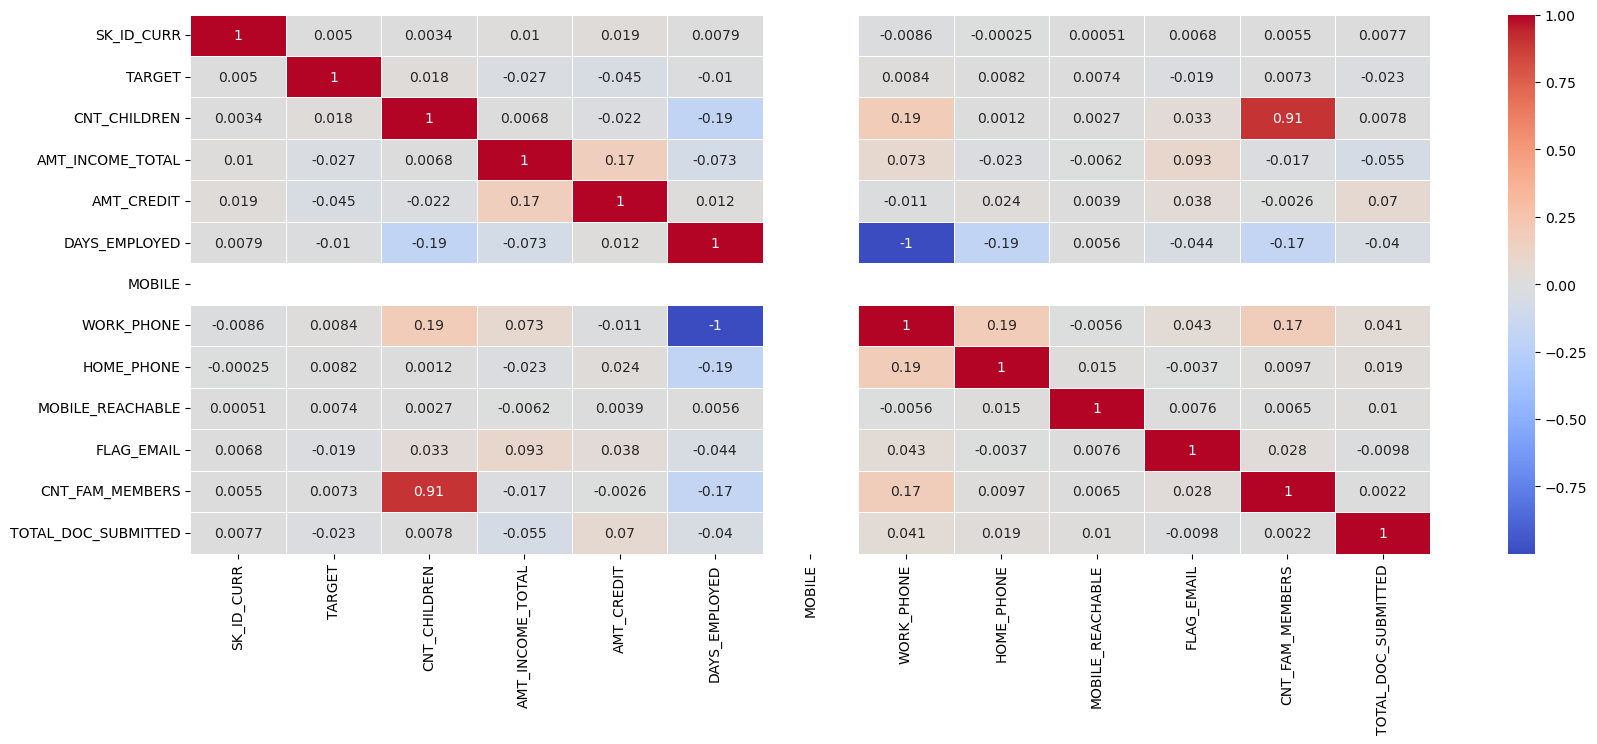

In [57]:
fig, ax=plt.subplots(figsize=(20,7))
sns.heatmap(l3.corr(), annot=True, cbar=0.5, linewidth=0.5, cmap="coolwarm")
plt.show()

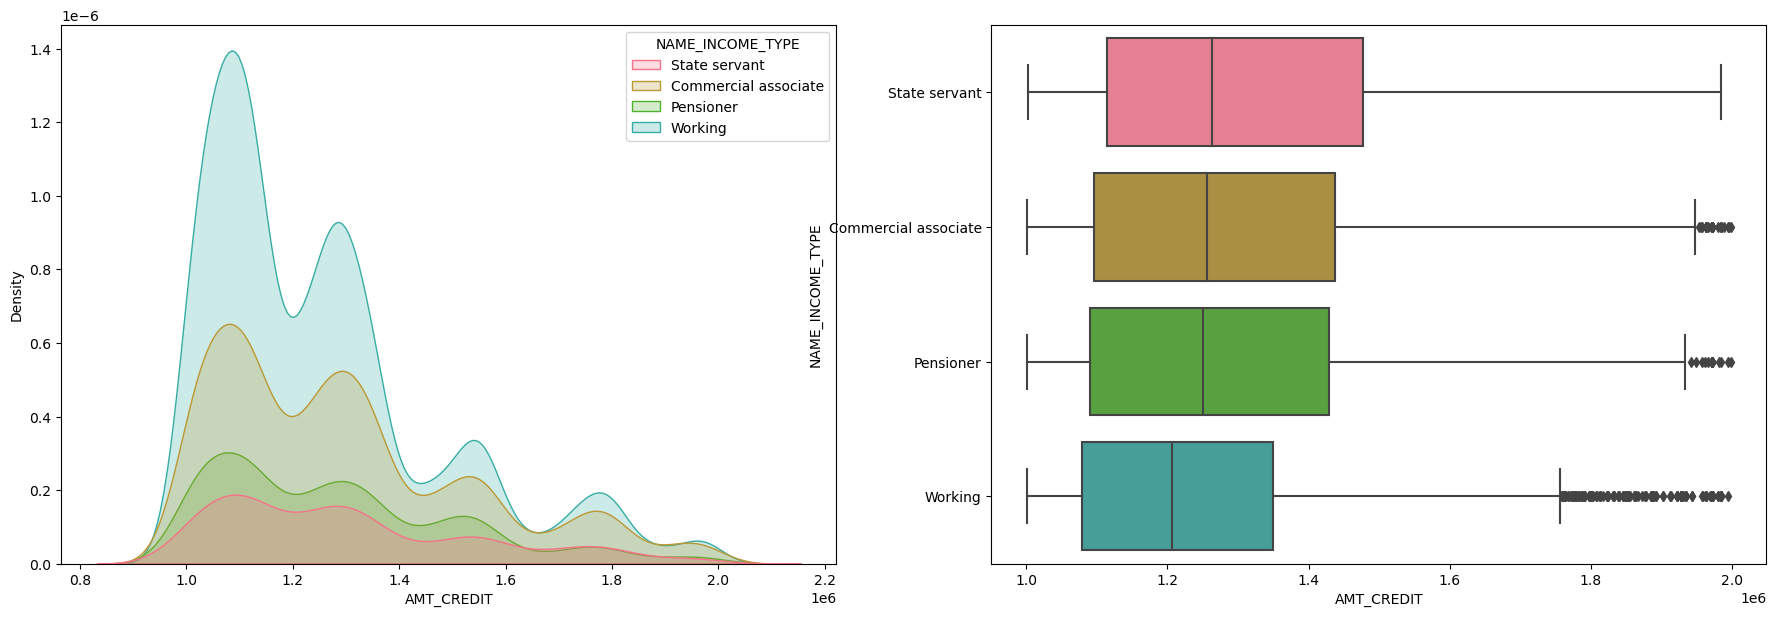

In [58]:
fig, ax = plt.subplots(1,2,figsize= (22, 7))

sns.boxplot(x = "AMT_CREDIT", y="NAME_INCOME_TYPE", data=l3,  ax=ax[1])
sns.kdeplot(x = "AMT_CREDIT", hue="NAME_INCOME_TYPE", data=l3,  ax=ax[0], shade=True)

plt.show()

# Interpretation--​
Majority of people have income till 1 lakh but they are getting credit between 10-20 lakhs.​

People have taken credit more between 10-14 lakhs.​

With increase in credit amount number of people decreases.​

For working people credit is between 11-13 lakhs, for others credit is between 11-15 lakhs.​

There are significant number of outliers for pensioners, working and commercial associate.​

​

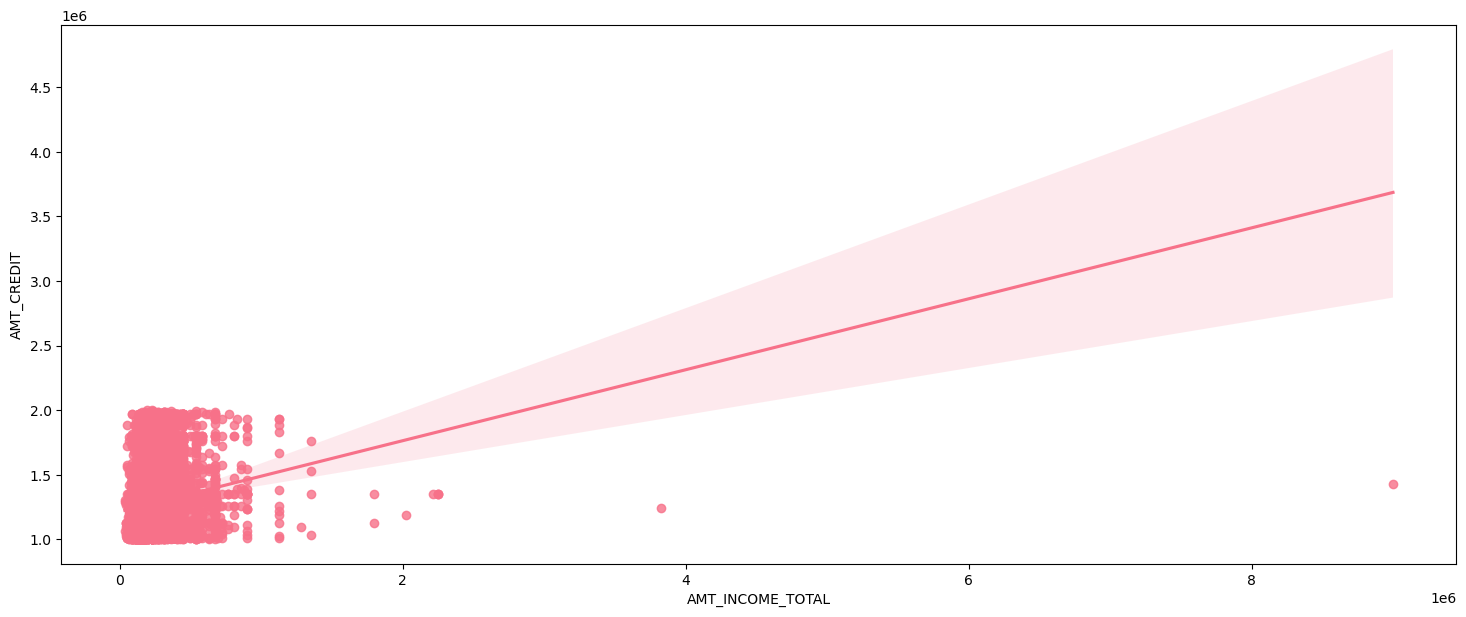

In [59]:
fig, ax = plt.subplots(figsize= (18, 7))
sns.regplot(x = "AMT_INCOME_TOTAL", y = "AMT_CREDIT", data=l3)

plt.show()

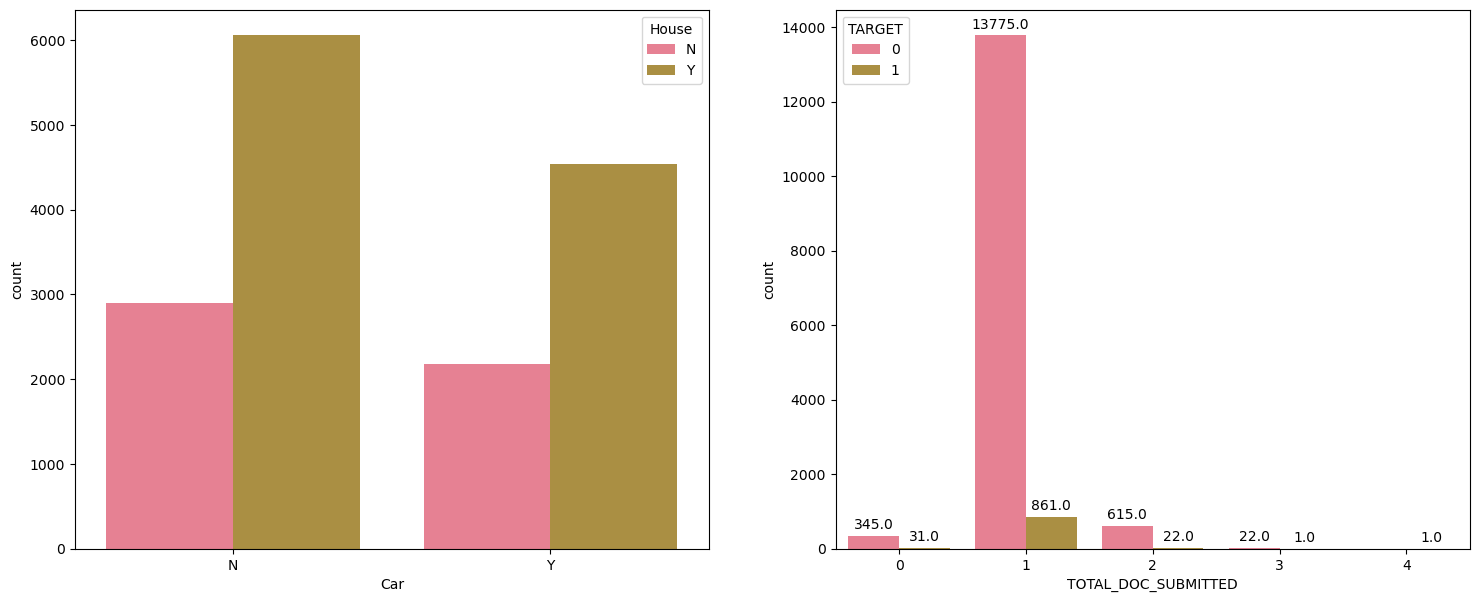

In [60]:
fig, ax = plt.subplots(1,2,figsize= (18, 7))
sns.countplot(x = "Car", hue = "House", data=l3, ax=ax[0])
# bar_count(ax[0], l3)
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data=l3, ax=ax[1])
bar_count(ax[1], l3)
plt.show()

In [61]:
gg=pd.pivot_table(index="Car", values="AMT_INCOME_TOTAL",columns=["House", "TARGET"], aggfunc="count", data=l3)
gg



House      N          Y     
TARGET     0    1     0    1
Car                         
N       2728  170  5673  382
Y       2080  102  4276  262

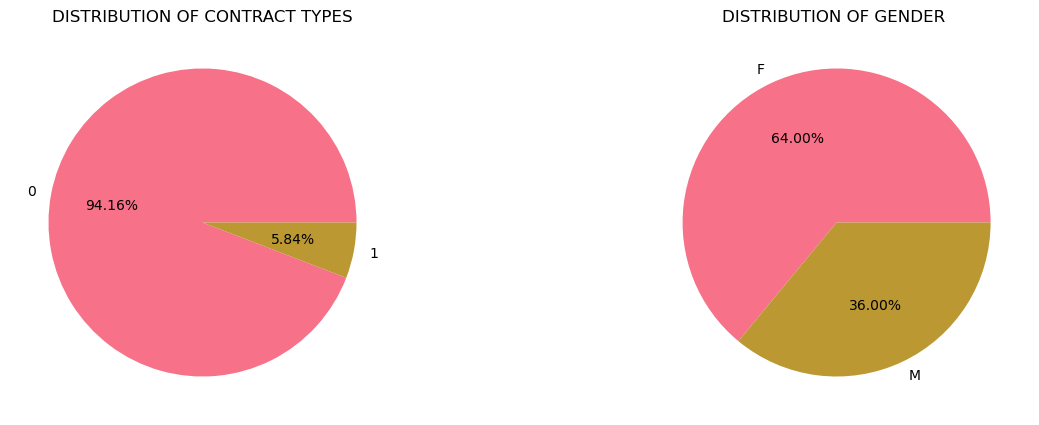

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].set_title("DISTRIBUTION OF CONTRACT TYPES")
ax[1].set_title("DISTRIBUTION OF GENDER ")
percentage = l3["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(l3["TARGET"].value_counts().index) # Converting the index of value counts into list
ax[0].pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

percentage1 = l3["GENDER"].value_counts()        
labels1 = list(l3["GENDER"].value_counts().index) 
ax[1].pie(percentage1,labels = labels1, autopct= "%0.2f%%") 
plt.show()

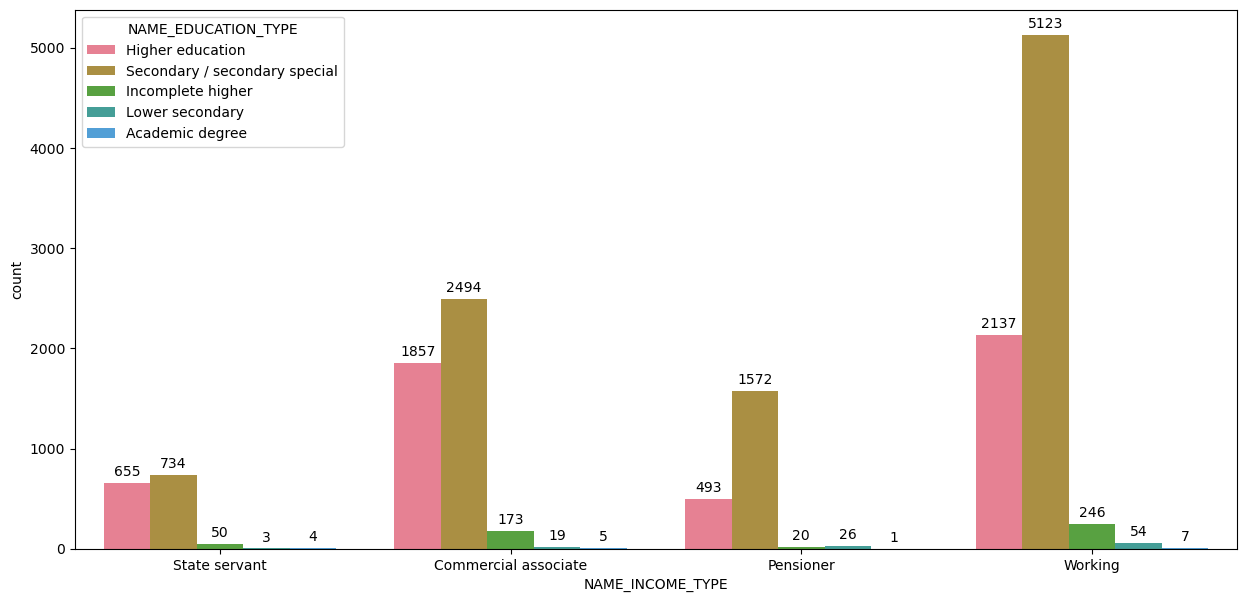

In [63]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.countplot(x="NAME_INCOME_TYPE", hue="NAME_EDUCATION_TYPE", data=l3)
bar_count(ax,l3)
plt.show()


In [64]:
gH=pd.pivot_table(index="NAME_INCOME_TYPE", values="AMT_INCOME_TOTAL",columns=["NAME_EDUCATION_TYPE", "TARGET"], aggfunc="count", data=l3)
gH.fillna(value=0, inplace=True)
gH


NAME_EDUCATION_TYPE  Academic degree      Higher education         \
TARGET                             0    1                0      1   
NAME_INCOME_TYPE                                                    
Commercial associate             4.0  1.0           1787.0   70.0   
Pensioner                        1.0  0.0            474.0   19.0   
State servant                    4.0  0.0            632.0   23.0   
Working                          7.0  0.0           2028.0  109.0   

NAME_EDUCATION_TYPE  Incomplete higher       Lower secondary       \
TARGET                               0     1               0    1   
NAME_INCOME_TYPE                                                    
Commercial associate             164.0   9.0            18.0  1.0   
Pensioner                         20.0   0.0            26.0  0.0   
State servant                     48.0   2.0             3.0  0.0   
Working                          227.0  19.0            50.0  4.0   

NAME_EDUCATION_TYPE  Secondary / secondary special         
TARGET                                           0      1  
NAME_INCOME_TYPE                                           
Commercial associate                        2336.0  158.0  
Pensioner                                   1479.0   93.0  
State servant                                691.0   43.0  
Working                                     4758.0  365.0

# Interpretation--​

People with academic degree and lower secondary education has no defaulters.​

People with incomplete higher education has less probability to default .​

People with secondary education and higher education have majority of defaulters.​

Commercial associate and working type income are defaulting more .​

Pensioners and state servant are defaulting less compared to others.​

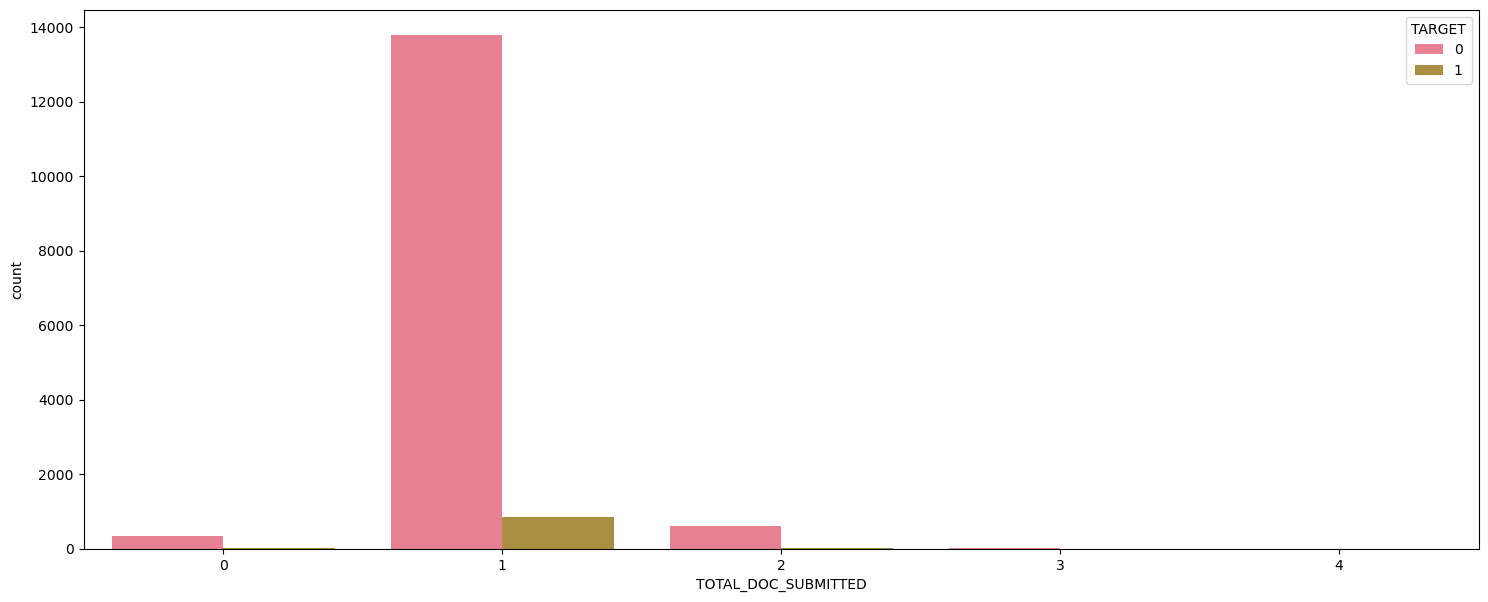

In [65]:
fig, ax = plt.subplots(figsize= (18, 7))
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue ="TARGET", data=l3)

plt.show()

# Interpretation--​

With increase in credit amount  , number of people defaulting is decreasing .​

People who have a car and who don’t , people with car are less defaulting as compared to people without car.​

People with house  are more in number and defaulting more than people without house.​

​

People whom have submitted single document have majority of defaulters. ​

People with 2 documents are small in numbers and less defaulting ​

​

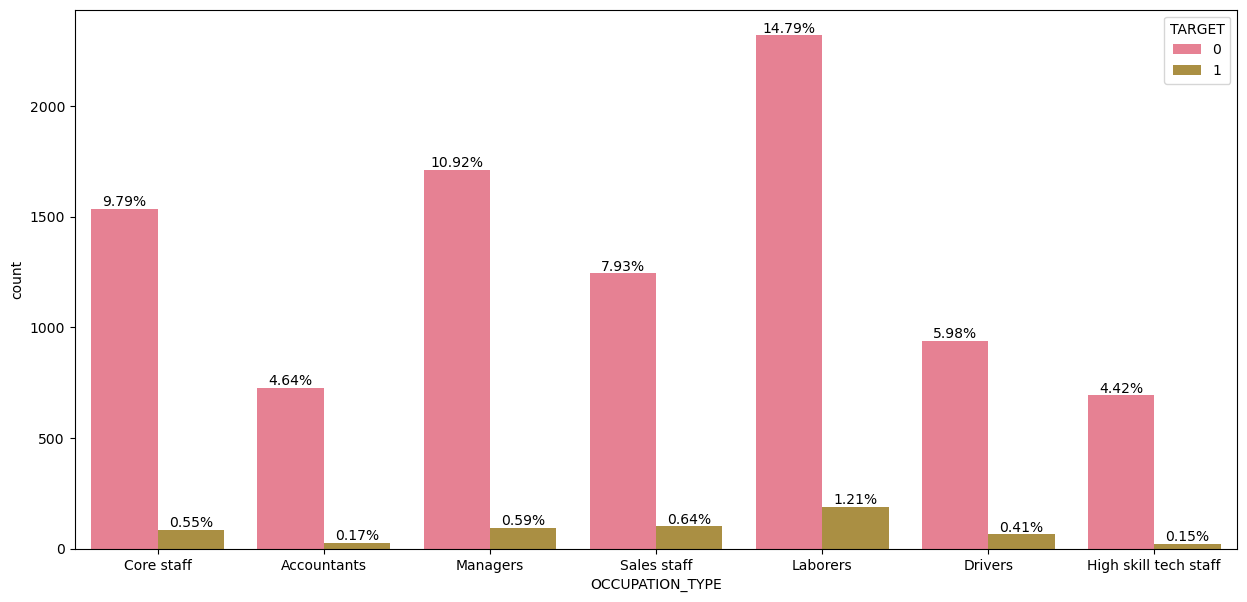

In [66]:
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(x=l3["OCCUPATION_TYPE"][l3["OCCUPATION_TYPE"].isin(['Core staff', 'High skill tech staff','Accountants',
       'Sales staff', 'Managers', 'Laborers',
       'Drivers',])], hue="TARGET", data=l3)
bar_percentage(ax, len(l3))
plt.show()


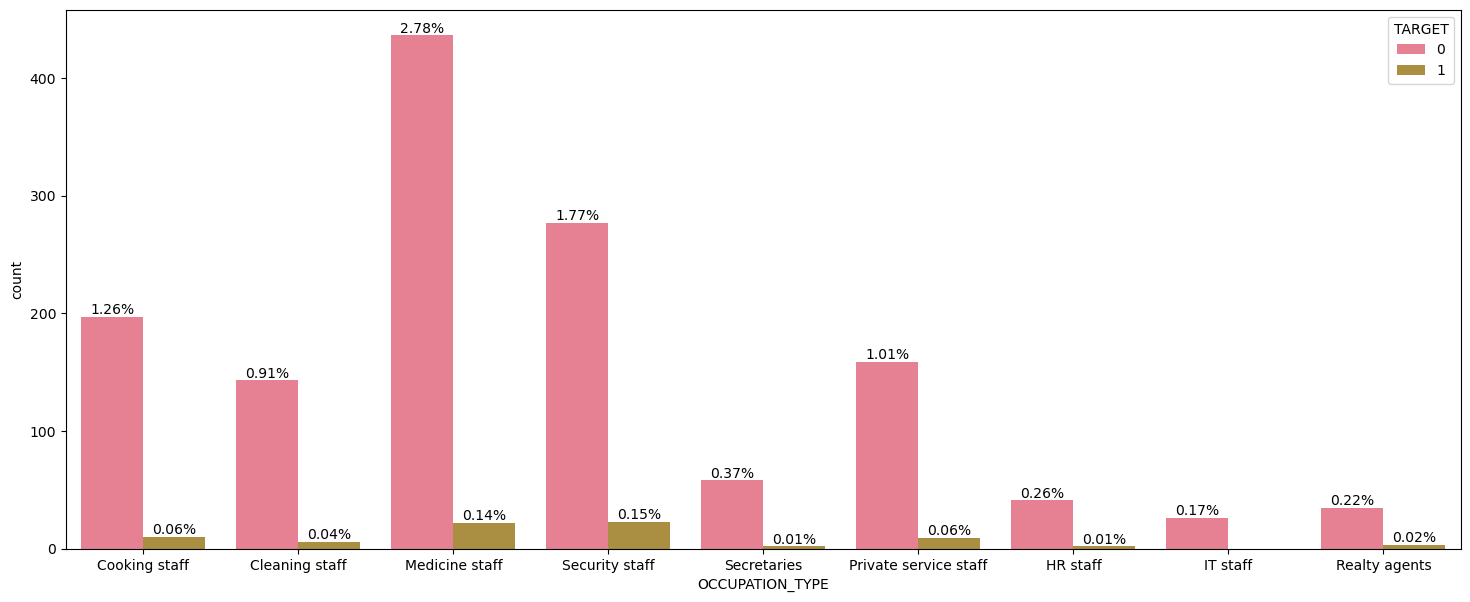

In [67]:

fig, ax = plt.subplots(figsize = (18,7))
sns.countplot(x=l3["OCCUPATION_TYPE"][l3["OCCUPATION_TYPE"].isin(['Private service staff',
       'Medicine staff', 'Security staff', 'Realty agents',
       'IT staff', 'Secretaries', 'Cleaning staff', 'Cooking staff',
       'HR staff'])], hue="TARGET", data=l3)
bar_percentage(ax, len(l3))
plt.show()

In [68]:
pp=pd.pivot_table(index="OCCUPATION_TYPE", values="AMT_INCOME_TOTAL",columns=["TARGET"], aggfunc="count", data=l3)
pp["probability"] = pp[1] / (pp[0]+pp[1])
pp=pp.sort_values(by= "probability", ascending=False)
pp

TARGET,0,1,probability
OCCUPATION_TYPE,,,
Low-skill Laborers,49.0,7.0,0.125000
Realty agents,35.0,3.0,0.078947
Security staff,277.0,23.0,0.076667
Laborers,2318.0,190.0,0.075758
Sales staff,1243.0,101.0,0.075149
Drivers,937.0,65.0,0.064870
Private service staff,159.0,9.0,0.053571
Core staff,1535.0,86.0,0.053054
Managers,1711.0,93.0,0.051552


# Interpretation---​​

​​

Majority of people have occupation as laborer, sales, drivers, core staff, high tech skills , managers and accountants.​​

Majority of defaulters for credit from 10-20 lakhs are low-skill labors, realty agents, security staff, sales, laborers, drivers, core staff and managers.​

People belonging to other occupations like accountants, secretaries, high skill tech staff are less probable to default. ​​

People belonging to IT staff have not defaulted .

#  CREDIT LIMIT GREATER THAN 20 LAKHS

In [69]:
l4 = df[(df["AMT_CREDIT"]>2000000)]
l4

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,2250000.0,...,1514,1,1,0,1,1,Core staff,3.0,FRIDAY,1
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,2250000.0,...,6158,1,1,0,1,0,Core staff,4.0,FRIDAY,1
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,2182500.0,...,13994,1,1,0,1,0,Core staff,2.0,MONDAY,1
748,100861,0,Cash loans,M,N,N,0,306000.0,2085120.0,1800000.0,...,5632,1,1,0,1,0,Private service staff,2.0,FRIDAY,1
871,100999,0,Cash loans,M,Y,N,0,450000.0,2125953.0,1984500.0,...,1354,1,1,0,1,0,High skill tech staff,1.0,FRIDAY,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99420,215428,0,Cash loans,F,N,Y,2,270000.0,2013840.0,1800000.0,...,4018,1,1,1,1,0,Managers,4.0,FRIDAY,1
99510,215526,0,Cash loans,F,N,Y,0,337500.0,2024721.0,1890000.0,...,309,1,1,0,1,0,Core staff,1.0,WEDNESDAY,0
99595,215630,0,Cash loans,M,Y,Y,0,202500.0,2254500.0,2254500.0,...,504,1,1,1,1,0,Core staff,2.0,WEDNESDAY,0
99669,215712,0,Cash loans,F,Y,Y,1,225000.0,2013840.0,1800000.0,...,2887,1,1,0,1,1,Core staff,3.0,THURSDAY,1


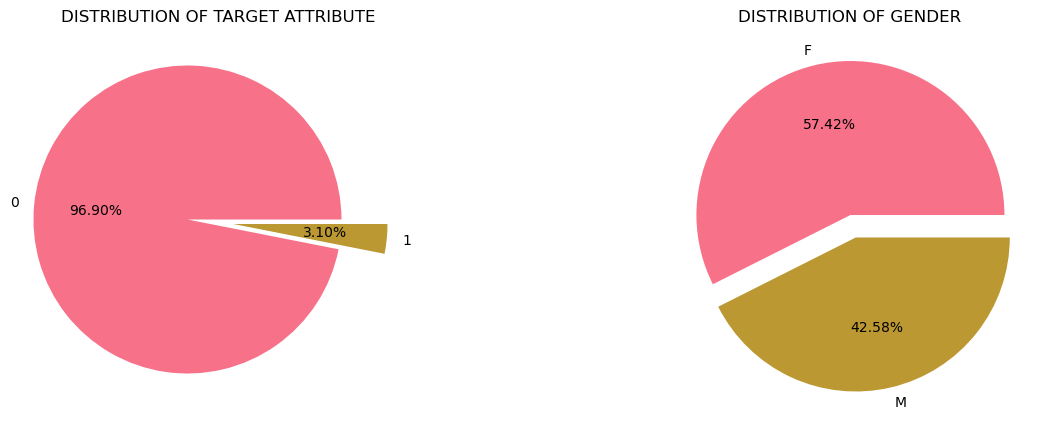

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].set_title("DISTRIBUTION OF TARGET ATTRIBUTE")
ax[1].set_title("DISTRIBUTION OF GENDER ")
percentage = l4["TARGET"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(l4["TARGET"].value_counts().index) # Converting the index of value counts into list
ax[0].pie(percentage,labels = labels, autopct= "%0.2f%%", explode=[0.2,0.1])  # autopct: to print the percentage on pie wedge. 2 decimal points used 

percentage1 = l4["GENDER"].value_counts()        
labels1 = list(l4["GENDER"].value_counts().index) 
ax[1].pie(percentage1,labels = labels1, autopct= "%0.2f%%", explode=[0.05,0.1]) 
plt.show()

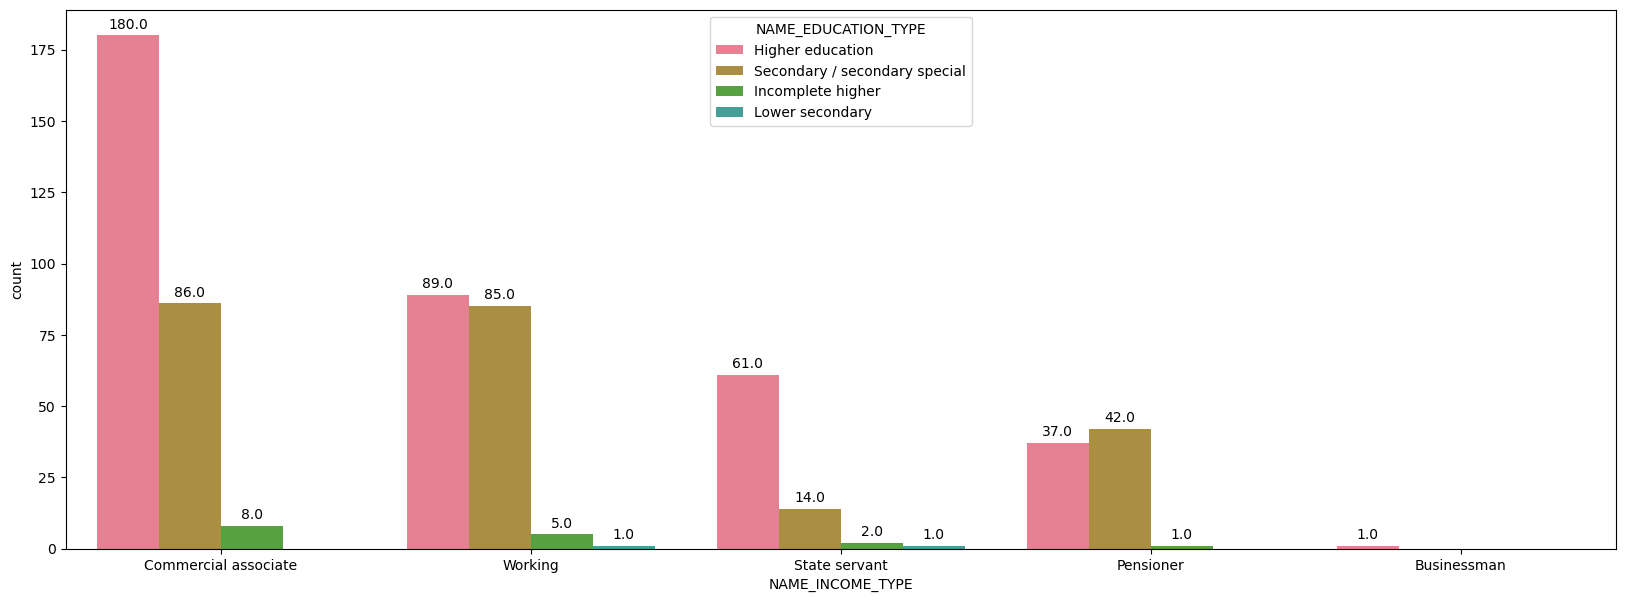

In [71]:
fig, ax = plt.subplots(figsize = (20, 7))
sns.countplot(x=l4["NAME_INCOME_TYPE"], hue=l4["NAME_EDUCATION_TYPE"])
bar_count(ax,l4)
plt.show()

In [72]:
gH=pd.pivot_table(index="NAME_INCOME_TYPE", values="AMT_INCOME_TOTAL",columns=["NAME_EDUCATION_TYPE", "TARGET"], aggfunc="count", data=l4)
gH.fillna(value=0, inplace=True)
gH

NAME_EDUCATION_TYPE  Higher education      Incomplete higher       \
TARGET                              0    1                 0    1   
NAME_INCOME_TYPE                                                    
Businessman                       1.0  0.0               0.0  0.0   
Commercial associate            176.0  4.0               7.0  1.0   
Pensioner                        37.0  0.0               1.0  0.0   
State servant                    59.0  2.0               2.0  0.0   
Working                          87.0  2.0               4.0  1.0   

NAME_EDUCATION_TYPE  Lower secondary Secondary / secondary special       
TARGET                             0                             0    1  
NAME_INCOME_TYPE                                                         
Businessman                      0.0                           0.0  0.0  
Commercial associate             0.0                          83.0  3.0  
Pensioner                        0.0                          40.0  2.0  
State servant                    1.0                          14.0  0.0  
Working                          1.0                          81.0  4.0

# Interpretation--​

People with incomplete higher and lower secondary education are  no defaulters.​

Pensioners with higher education and stater servant with secondary education are also not defaulting.​

People with higher education and secondary education  and working as commercial associate are more likely to default.​

​

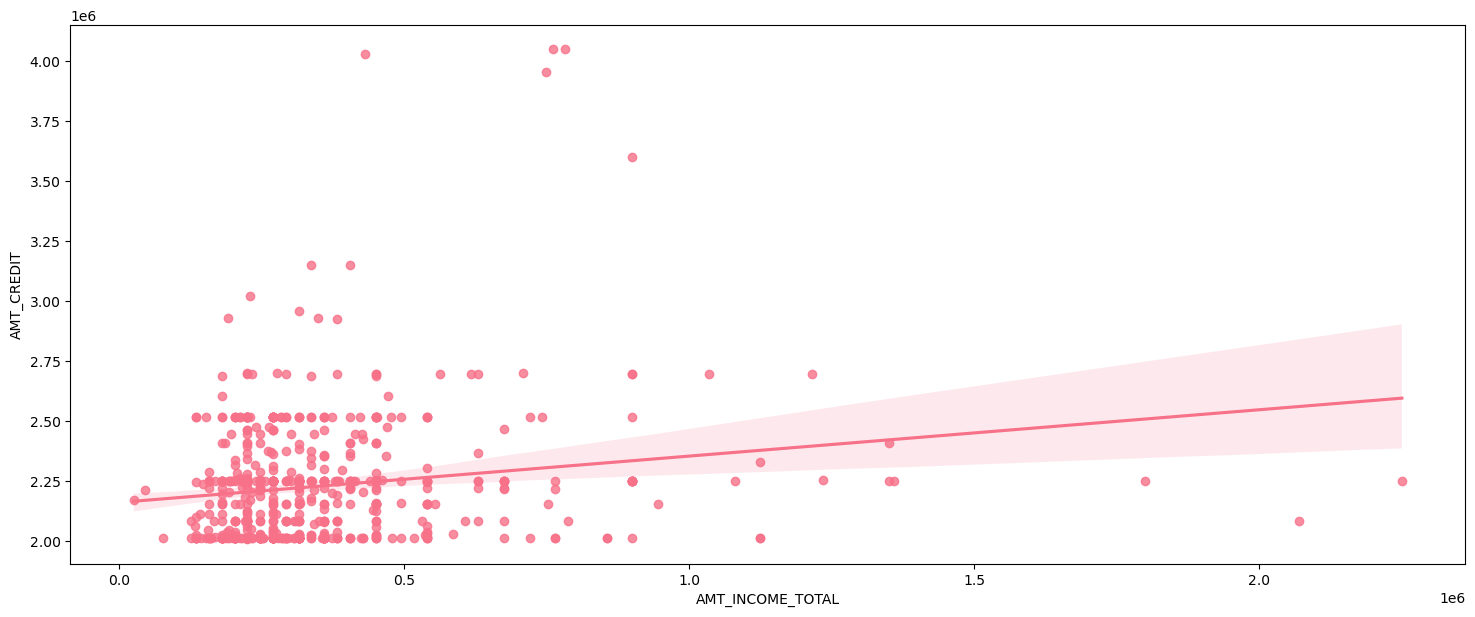

In [73]:
fig, ax = plt.subplots(figsize= (18, 7))
sns.regplot(x = l4['AMT_INCOME_TOTAL'], y = l4['AMT_CREDIT'], data=l4)
plt.show()

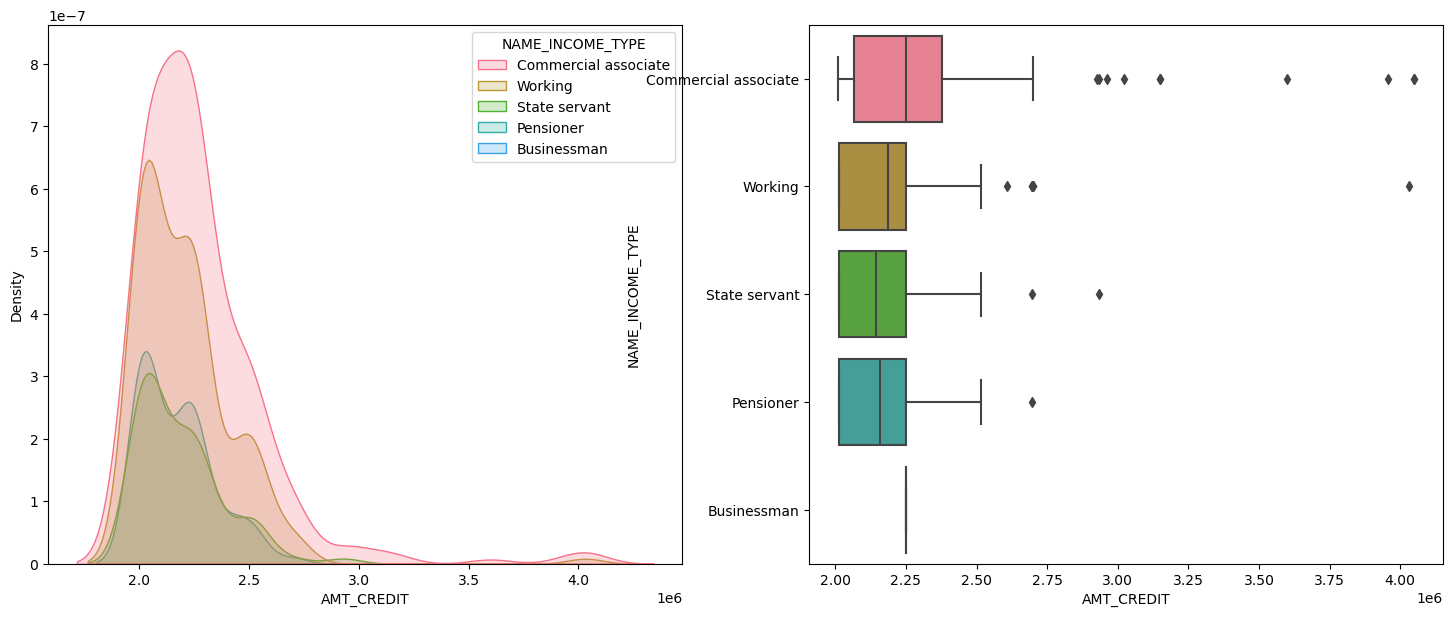

In [74]:
fig, ax = plt.subplots(1,2,figsize= (18, 7))
sns.boxplot(x = "AMT_CREDIT", y="NAME_INCOME_TYPE", data=l4,  ax=ax[1])
sns.kdeplot(x = "AMT_CREDIT", hue="NAME_INCOME_TYPE", data=l4,  ax=ax[0], shade=True)

plt.show()

# Interpretation--​

​

Majority of people have income till 1 lakh but they are getting credit more than 20 lakhs.​

People have taken credit more between 20-25 lakhs.​

There are significant number of outliers for pensioners, working and commercial associate.​

Commercial associate have taken very high amount of credit .​

Working, pensioner, state servant have taken loans between 20-22.5 lakhs mostly.​

Higher amount of loans are given to people with 50K to 1lakh income.​

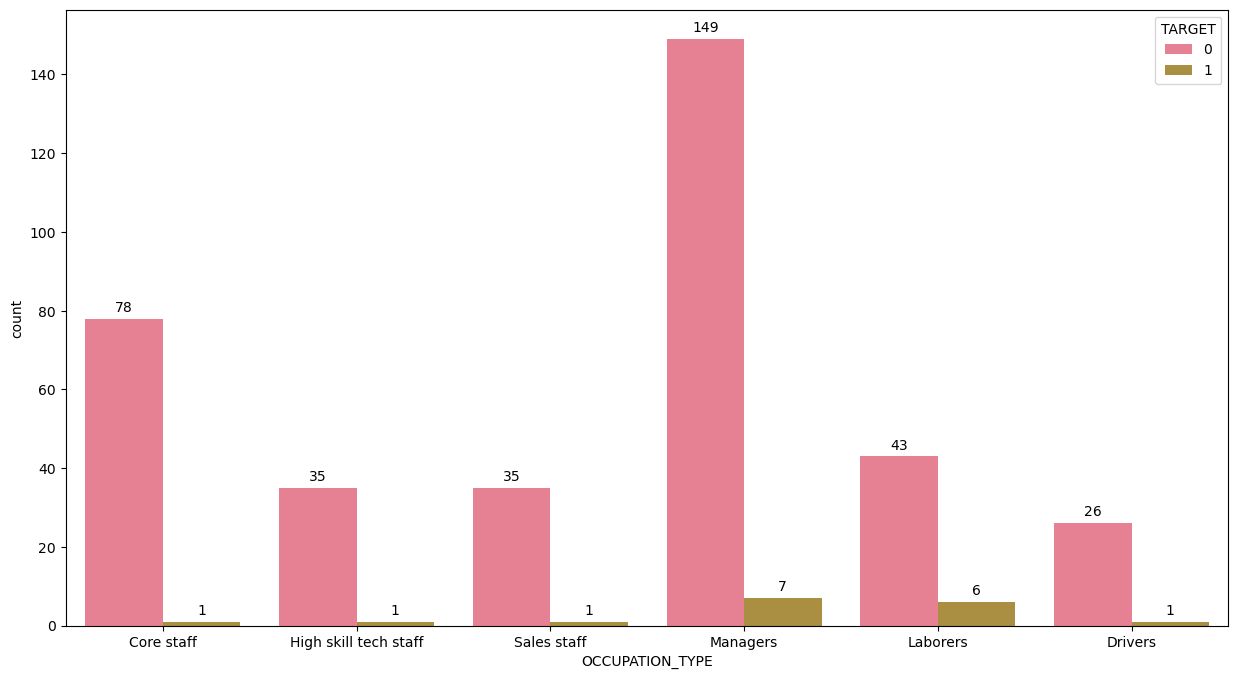

In [75]:
fig, ax = plt.subplots(figsize = (15,8))
sns.countplot(x=l4["OCCUPATION_TYPE"][l4["OCCUPATION_TYPE"].isin(['Core staff', 'High skill tech staff',
       'Sales staff', 'Managers', 'Laborers',
       'Drivers',])], hue="TARGET", data=l4)
bar_count(ax,l4)
plt.show()

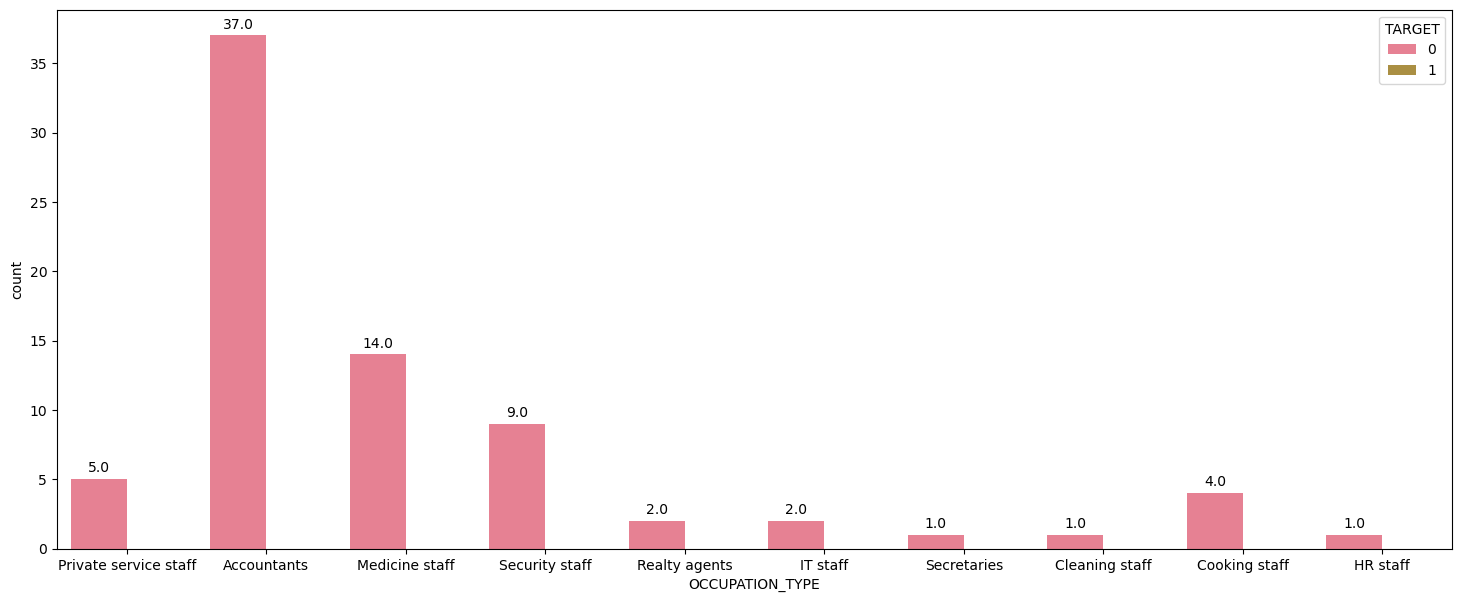

In [76]:
fig, ax = plt.subplots(figsize = (18,7))
sns.countplot(x=l4["OCCUPATION_TYPE"][l4["OCCUPATION_TYPE"].isin(['Private service staff','Accountants',
       'Medicine staff', 'Security staff', 'Realty agents',
       'IT staff', 'Secretaries', 'Cleaning staff', 'Cooking staff',
       'HR staff'])], hue="TARGET", data=l4)
bar_count(ax,l4)
plt.show()

In [77]:
pp=pd.pivot_table(index="OCCUPATION_TYPE", values="AMT_INCOME_TOTAL",columns=["TARGET"], aggfunc="count", data=l4)

pp["probability"] = pp[1] / (pp[0]+pp[1])
pp=pp.sort_values(by= "probability", ascending=False)
pp

TARGET,0,1,probability
OCCUPATION_TYPE,,,
Laborers,43.0,6.0,0.122449
Managers,149.0,7.0,0.044872
Drivers,26.0,1.0,0.037037
High skill tech staff,35.0,1.0,0.027778
Sales staff,35.0,1.0,0.027778
Core staff,78.0,1.0,0.012658
Accountants,37.0,NaN,NaN
Cleaning staff,1.0,NaN,NaN
Cooking staff,4.0,NaN,NaN


# Interpretation---​​

​​

Majority of defaulters for credit more than 20 lakhs are laborers, and managers.​

People belonging to other occupations like sales, high skill tech, core staff are less probable to default. ​​

People belonging to IT staff , accountants, medicine, hr staff etc  have not defaulted for large amount loans .

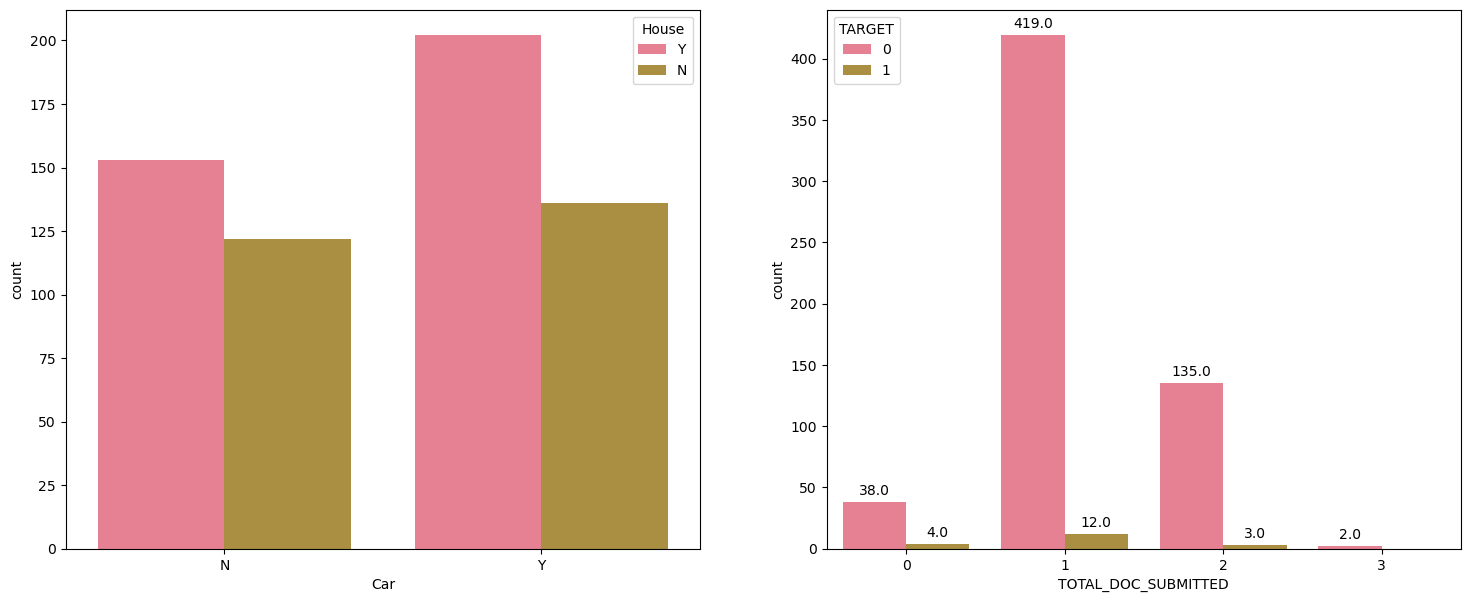

In [78]:
fig, ax = plt.subplots(1,2,figsize= (18, 7))
sns.countplot(x = "Car", hue = "House", data=l4, ax=ax[0])
sns.countplot(x = "TOTAL_DOC_SUBMITTED", hue = "TARGET", data=l4, ax=ax[1])
bar_count(ax[1],l4)
plt.show()

In [79]:
gg=pd.pivot_table(index="Car", values="AMT_INCOME_TOTAL",columns=["House", "TARGET"], aggfunc="count", data=l4)
gg

House       N           Y     
TARGET      0    1      0    1
Car                           
N       114.0  8.0  153.0  NaN
Y       132.0  4.0  195.0  7.0

# Interpretation--​

People who have a car and who don’t  have a house are less defaulting .​

People with house only don’t default .​

People who don’t have both are defaulting more as compared to who have both.​

People whom have submitted single document have majority of defaulters. ​

People with 2 documents  for large credit amount are more in numbers and less defaulting .